In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DBD_Clustering/Kuesioner Penyakit Demam Berdarah - Sheet14.csv')

data_status_gizi_laki = pd.read_csv('/content/gdrive/MyDrive/DBD_Clustering/status_gizi_laki.csv', header=1)
data_status_gizi_perempuan = pd.read_csv('/content/gdrive/MyDrive/DBD_Clustering/status_gizi_perempuan.csv', header=1)

In [ ]:
df.head()

,Timestamp,No.Handphone,Tanggal Lahir,Umur (dalam tahun dan bulan),Tinggi Badan (dalam cm),Berat badan (dalam kg),Jenis Kelamin,Kelurahan,Kecamatan,Kab/Kota,...,Apakah terdapat anggota keluarga yang pernah menderita demam berdarah selama kurun waktu 6 bulan?,"Jika ya, keadaan penderita tersebut saat ini :",Apakah Pasien pernah menerima vaksin/imunisasi Dengvaxia (CYD-TDV) untuk mencegah penyakit demam berdarah?,Apa pasien pernah di opname sebelumnya?,"Jika pernah, opnamenya karena penyakit apa saja?",Berapa Luas rumah tempat tinggal pasien?,berapa jumlah kamar tidur dirumah?,berapa jumlah orang yang tinggal di dalam rumah?,Apakah disekitar rumah ada genangan air atau rumah yang saling berdekatan?,Apakah jendela dan ventilasi rumah anda dipasangkan kawat?
0,9/20/2022 12:35:51,089634964040,7/13/1997,24 tahun,170 cm,65 kg,Laki-Laki,Katangka,Somba Opu,Gowa,...,Tidak,Sehat,Ya,Ya,"Dbd,tipes,muntaber",< 36 m^2,2,5,Tidak,Tidak
1,9/20/2022 13:03:50,085298055458,7/5/2000,22 tahun,160 cm,52 kg,Laki-Laki,Balang Baru,Tamalate,Makassar,...,Ada tapi cuma 1 minggu,Sehat,Tidak,Ya,"DBD,muntaber",< 36 m^2,1,2,Tidak,Ya
2,9/20/2022 13:08:58,085298055458,7/5/2000,22 tahun,160 cm,52 kg,Laki-Laki,Balang Baru,Tamalate,Makassar,...,Tidak,Sehat,Tidak,Tidak,Tidak pernah,< 36 m^2,10,2,Ya,Ya
3,9/20/2022 13:25:02,081242172400,1/22/2014,8 tahun 8 bulan,130 cm,29 kg,Perempuan,Sungguminasa,Gowa,Gowa,...,Ya,Sehat,Ya,Ya,Tipes,36 - 54 m^2,2,4,Ya,Ya
4,9/20/2022 13:28:37,085342678908,11/28/1987,34 tahun 10 bulan,162 cm,78 kg,Laki-Laki,Somba Opu,Gowa,Gowa,...,Tidak,Sehat,Tidak,Ya,Demam berdarah dan tipes,36 - 54 m^2,2,5,Ya,Ya


# PRE PROCESSING DATA

# DATA CLEANING

In [ ]:
df = df.drop(['Timestamp',
        'No.Handphone',
        'Tanggal Lahir',
        'Alamat (mohon sertakan nama kelurahan dan kecamatan)',
        'Apa pasien pernah di opname sebelumnya?'],
        axis=1)

In [ ]:
df.head()

,Umur (dalam tahun dan bulan),Tinggi Badan (dalam cm),Berat badan (dalam kg),Jenis Kelamin,Kelurahan,Kecamatan,Kab/Kota,Pekerjaan Orang tua,Pendapatan Orang Tua,Ciri seseorang terkena DBD adalah demam tinggi mendadak 2-7 hari dan terdapat bintik-bintik merah pada kulit.,Apakah anda pernah menderita demam berdarah?,Apakah terdapat anggota keluarga yang pernah menderita demam berdarah selama kurun waktu 6 bulan?,"Jika ya, keadaan penderita tersebut saat ini :",Apakah Pasien pernah menerima vaksin/imunisasi Dengvaxia (CYD-TDV) untuk mencegah penyakit demam berdarah?,"Jika pernah, opnamenya karena penyakit apa saja?",Berapa Luas rumah tempat tinggal pasien?,berapa jumlah kamar tidur dirumah?,berapa jumlah orang yang tinggal di dalam rumah?,Apakah disekitar rumah ada genangan air atau rumah yang saling berdekatan?,Apakah jendela dan ventilasi rumah anda dipasangkan kawat?
0,24 tahun,170 cm,65 kg,Laki-Laki,Katangka,Somba Opu,Gowa,Karyawan Swasta,2.500.000 - 5.000.000,Ya,Ya,Tidak,Sehat,Ya,"Dbd,tipes,muntaber",< 36 m^2,2,5,Tidak,Tidak
1,22 tahun,160 cm,52 kg,Laki-Laki,Balang Baru,Tamalate,Makassar,Petani,< 2.500.000,Ya,Ya,Ada tapi cuma 1 minggu,Sehat,Tidak,"DBD,muntaber",< 36 m^2,1,2,Tidak,Ya
2,22 tahun,160 cm,52 kg,Laki-Laki,Balang Baru,Tamalate,Makassar,Buruh tani,< 2.500.000,Ya,Tidak,Tidak,Sehat,Tidak,Tidak pernah,< 36 m^2,10,2,Ya,Ya
3,8 tahun 8 bulan,130 cm,29 kg,Perempuan,Sungguminasa,Gowa,Gowa,PNS,2.500.000 - 5.000.000,Ya,Tidak,Ya,Sehat,Ya,Tipes,36 - 54 m^2,2,4,Ya,Ya
4,34 tahun 10 bulan,162 cm,78 kg,Laki-Laki,Somba Opu,Gowa,Gowa,Honorer,< 2.500.000,Ya,Ya,Tidak,Sehat,Tidak,Demam berdarah dan tipes,36 - 54 m^2,2,5,Ya,Ya


In [ ]:
df = df.rename(columns = {
    'Umur (dalam tahun dan bulan)': 'umur',
    'Ciri seseorang terkena DBD adalah demam tinggi mendadak 2-7 hari dan terdapat bintik-bintik merah pada kulit.': 'ciri-ciri terkena DBD',
    'Apakah terdapat anggota keluarga yang pernah menderita demam berdarah selama kurun waktu 6 bulan?': 'riwayat DBD orang serumah',
    'Jika ya, keadaan penderita tersebut saat ini :': 'penyakit lainnya',
    'Apakah Pasien pernah menerima vaksin/imunisasi Dengvaxia (CYD-TDV) untuk mencegah penyakit demam berdarah?': 'riwayat vaksin CYD',
    'Jika pernah, opnamenya karena penyakit apa saja? ': 'penyakit opname',
    'Berapa Luas rumah tempat tinggal pasien?': 'luas rumah',
    'berapa jumlah kamar tidur dirumah?': 'jumlah kamar',
    'berapa jumlah orang yang tinggal di dalam rumah?': 'jumlah orang',
    'Apakah disekitar rumah ada genangan air atau rumah yang saling berdekatan?': 'genangan air sekitar',
    'Apakah jendela dan ventilasi rumah anda dipasangkan kawat?' : 'ventilasi',
    'Apakah anda pernah menderita demam berdarah?': 'Pernah DBD',

})

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace('laki-Laki', 'Laki-Laki')

In [ ]:
df.head()

,umur,Tinggi Badan (dalam cm),Berat badan (dalam kg),Jenis Kelamin,Kelurahan,Kecamatan,Kab/Kota,Pekerjaan Orang tua,Pendapatan Orang Tua,ciri-ciri terkena DBD,Pernah DBD,riwayat DBD orang serumah,penyakit lainnya,riwayat vaksin CYD,penyakit opname,luas rumah,jumlah kamar,jumlah orang,genangan air sekitar,ventilasi
0,24 tahun,170 cm,65 kg,Laki-Laki,Katangka,Somba Opu,Gowa,Karyawan Swasta,2.500.000 - 5.000.000,Ya,Ya,Tidak,Sehat,Ya,"Dbd,tipes,muntaber",< 36 m^2,2,5,Tidak,Tidak
1,22 tahun,160 cm,52 kg,Laki-Laki,Balang Baru,Tamalate,Makassar,Petani,< 2.500.000,Ya,Ya,Ada tapi cuma 1 minggu,Sehat,Tidak,"DBD,muntaber",< 36 m^2,1,2,Tidak,Ya
2,22 tahun,160 cm,52 kg,Laki-Laki,Balang Baru,Tamalate,Makassar,Buruh tani,< 2.500.000,Ya,Tidak,Tidak,Sehat,Tidak,Tidak pernah,< 36 m^2,10,2,Ya,Ya
3,8 tahun 8 bulan,130 cm,29 kg,Perempuan,Sungguminasa,Gowa,Gowa,PNS,2.500.000 - 5.000.000,Ya,Tidak,Ya,Sehat,Ya,Tipes,36 - 54 m^2,2,4,Ya,Ya
4,34 tahun 10 bulan,162 cm,78 kg,Laki-Laki,Somba Opu,Gowa,Gowa,Honorer,< 2.500.000,Ya,Ya,Tidak,Sehat,Tidak,Demam berdarah dan tipes,36 - 54 m^2,2,5,Ya,Ya


In [ ]:
data_status_gizi_laki['Tahun'] = data_status_gizi_laki['Tahun'].replace(np.nan, 0)
data_status_gizi_perempuan['Tahun'] = data_status_gizi_perempuan['Tahun'].replace(np.nan, 0)

In [ ]:
df= df.replace(np.nan, 'Tidak Pernah')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   umur                       102 non-null    object
 1   Tinggi Badan (dalam cm)    102 non-null    object
 2   Berat badan (dalam kg)     102 non-null    object
 3   Jenis Kelamin              102 non-null    object
 4   Kelurahan                  102 non-null    object
 5   Kecamatan                  102 non-null    object
 6   Kab/Kota                   102 non-null    object
 7   Pekerjaan Orang tua        102 non-null    object
 8   Pendapatan Orang Tua       102 non-null    object
 9   ciri-ciri terkena DBD      102 non-null    object
 10  Pernah DBD                 102 non-null    object
 11  riwayat DBD orang serumah  102 non-null    object
 12  penyakit lainnya           102 non-null    object
 13  riwayat vaksin CYD         102 non-null    object
 14  penyakit o

In [ ]:
df.head()

,umur,Tinggi Badan (dalam cm),Berat badan (dalam kg),Jenis Kelamin,Kelurahan,Kecamatan,Kab/Kota,Pekerjaan Orang tua,Pendapatan Orang Tua,ciri-ciri terkena DBD,Pernah DBD,riwayat DBD orang serumah,penyakit lainnya,riwayat vaksin CYD,penyakit opname,luas rumah,jumlah kamar,jumlah orang,genangan air sekitar,ventilasi
0,24 tahun,170 cm,65 kg,Laki-Laki,Katangka,Somba Opu,Gowa,Karyawan Swasta,2.500.000 - 5.000.000,Ya,Ya,Tidak,Sehat,Ya,"Dbd,tipes,muntaber",< 36 m^2,2,5,Tidak,Tidak
1,22 tahun,160 cm,52 kg,Laki-Laki,Balang Baru,Tamalate,Makassar,Petani,< 2.500.000,Ya,Ya,Ada tapi cuma 1 minggu,Sehat,Tidak,"DBD,muntaber",< 36 m^2,1,2,Tidak,Ya
2,22 tahun,160 cm,52 kg,Laki-Laki,Balang Baru,Tamalate,Makassar,Buruh tani,< 2.500.000,Ya,Tidak,Tidak,Sehat,Tidak,Tidak pernah,< 36 m^2,10,2,Ya,Ya
3,8 tahun 8 bulan,130 cm,29 kg,Perempuan,Sungguminasa,Gowa,Gowa,PNS,2.500.000 - 5.000.000,Ya,Tidak,Ya,Sehat,Ya,Tipes,36 - 54 m^2,2,4,Ya,Ya
4,34 tahun 10 bulan,162 cm,78 kg,Laki-Laki,Somba Opu,Gowa,Gowa,Honorer,< 2.500.000,Ya,Ya,Tidak,Sehat,Tidak,Demam berdarah dan tipes,36 - 54 m^2,2,5,Ya,Ya


In [ ]:
# 1. TRANSFORMASI KOLOM UMUR

age = df['umur'].str.split(r'(\d+)', expand = True)
age = age.replace([None], '0')
tinggi = df['Tinggi Badan (dalam cm)'].str.split(r'(\d+)', expand = True)
tinggi = tinggi.replace([None], '0')
berat = df['Berat badan (dalam kg)'].str.split(r'(\d+)', expand = True)
berat = berat.replace([None], '0')

df['Tahun'] = age[1]
df['Tinggi Badan (dalam cm)'] = tinggi[1]
df['Berat badan (dalam kg)'] = berat[1]
df['Bulan'] = age[3]

df = df.astype({"Tahun": float, "Bulan": float, "Tinggi Badan (dalam cm)": float, "Berat badan (dalam kg)": float})


df.head()

,umur,Tinggi Badan (dalam cm),Berat badan (dalam kg),Jenis Kelamin,Kelurahan,Kecamatan,Kab/Kota,Pekerjaan Orang tua,Pendapatan Orang Tua,ciri-ciri terkena DBD,...,penyakit lainnya,riwayat vaksin CYD,penyakit opname,luas rumah,jumlah kamar,jumlah orang,genangan air sekitar,ventilasi,Tahun,Bulan
0,24 tahun,170.0,65.0,Laki-Laki,Katangka,Somba Opu,Gowa,Karyawan Swasta,2.500.000 - 5.000.000,Ya,...,Sehat,Ya,"Dbd,tipes,muntaber",< 36 m^2,2,5,Tidak,Tidak,24.0,0.0
1,22 tahun,160.0,52.0,Laki-Laki,Balang Baru,Tamalate,Makassar,Petani,< 2.500.000,Ya,...,Sehat,Tidak,"DBD,muntaber",< 36 m^2,1,2,Tidak,Ya,22.0,0.0
2,22 tahun,160.0,52.0,Laki-Laki,Balang Baru,Tamalate,Makassar,Buruh tani,< 2.500.000,Ya,...,Sehat,Tidak,Tidak pernah,< 36 m^2,10,2,Ya,Ya,22.0,0.0
3,8 tahun 8 bulan,130.0,29.0,Perempuan,Sungguminasa,Gowa,Gowa,PNS,2.500.000 - 5.000.000,Ya,...,Sehat,Ya,Tipes,36 - 54 m^2,2,4,Ya,Ya,8.0,8.0
4,34 tahun 10 bulan,162.0,78.0,Laki-Laki,Somba Opu,Gowa,Gowa,Honorer,< 2.500.000,Ya,...,Sehat,Tidak,Demam berdarah dan tipes,36 - 54 m^2,2,5,Ya,Ya,34.0,10.0


In [ ]:
# df['Jenis Kelamin']

jk = df['Jenis Kelamin'].unique()
print('Total JK: {} \n{}\n'.format(len(jk), jk))

df.info()

Total JK: 2 
['Laki-Laki' 'Perempuan']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   umur                       102 non-null    object 
 1   Tinggi Badan (dalam cm)    102 non-null    float64
 2   Berat badan (dalam kg)     102 non-null    float64
 3   Jenis Kelamin              102 non-null    object 
 4   Kelurahan                  102 non-null    object 
 5   Kecamatan                  102 non-null    object 
 6   Kab/Kota                   102 non-null    object 
 7   Pekerjaan Orang tua        102 non-null    object 
 8   Pendapatan Orang Tua       102 non-null    object 
 9   ciri-ciri terkena DBD      102 non-null    object 
 10  Pernah DBD                 102 non-null    object 
 11  riwayat DBD orang serumah  102 non-null    object 
 12  penyakit lainnya           102 non-null    object 
 13  riwayat va

In [ ]:
# 2. MENAMBAH KOLOM 'STATUS GIZI'

# Hitung Nilai IMT menggunakan rumus (IMT = Berat/Tinggi^2)


df['IMT'] = np.round(df['Berat badan (dalam kg)']/(df['Tinggi Badan (dalam cm)'] * df['Tinggi Badan (dalam cm)'] / 10000), 2)

# Menentukan nilai Status Gizi tiap data

def count_z_score(jenis_kelamin, tahun, bulan, imt):
  def count_z(idx):
      if (imt > status_gender['Median'][idx[0]]):
        z = (imt - status_gender['Median'][idx[0]]) / (status_gender['+1 SD'][idx[0]] - status_gender['Median'][idx[0]])
      else:
        z = (imt - status_gender['Median'][idx[0]]) / (status_gender['Median'][idx[0]] - status_gender['-1 SD'][idx[0]])
      return z

  if jenis_kelamin == 'Laki-Laki':
    status_gender = data_status_gizi_laki.copy()
  else:
    status_gender = data_status_gizi_perempuan.copy()

  if (tahun < 5):
    tahun = tahun * 12
    bulan = tahun + bulan
    index = status_gender.index[status_gender['Bulan'] == bulan].tolist()
    z_score = count_z(index)
  else:
    index = status_gender.index[(status_gender['Tahun'] == tahun) & (status_gender['Bulan'] == bulan)].tolist()
    if ((tahun == 5) & (bulan == 0)):
      index = status_gender.index[(status_gender['Tahun'] == 5) & (status_gender['Bulan'] == 1)].tolist()
      index[0] = index[0] - 1
    z_score = count_z(index)
  return z_score

# z_score = np.round(count_z_score('Perempuan', 10, 0, 19.6), 2)
# print(z_score)
# print(df['Jenis Kelamin'][i])
# print(int(df['tahun'][i]))
# print(int(df['bulan'][i]))
# print(df['IMT'][i])

status_gizi = []
i = 0
for imt in df['IMT']:
  z_score = np.round(count_z_score(df['Jenis Kelamin'][i], int(df['Tahun'][i]), int(df['Bulan'][i]), df['IMT'][i]), 2)

  if (int(df['Tahun'][i]) < 5):
    if (z_score < -3):
      status = "Gizi buruk"
    elif ((z_score > -3) & (z_score < -2)):
      status = "Gizi kurang"
    elif ((z_score >= -2) & (z_score < 1)):
      status = "Gizi baik"
    elif ((z_score >= 1) & (z_score < 2)):
      status = "Berisiko gizi lebih"
    elif ((z_score >= 2) & (z_score < 3)):
      status = "Gizi lebih"
    elif ((z_score) >= 3):
      status = "Obesitas"
  else:
    if ((z_score >= -3) & (z_score < -2)):
      status = "Gizi kurang"
    elif ((z_score >= -2) & (z_score < 1)):
      status = "Gizi baik"
    elif ((z_score >= 1) & (z_score < 2)):
      status = "Gizi lebih"
    elif ((z_score) >= 2):
      status = "Obesitas"

  # print("IMT = ", imt, ", Z score = ", z_score)
  status_gizi.append(status)
  i += 1

df['Status Gizi'] = status_gizi

In [ ]:
df.head()

,umur,Tinggi Badan (dalam cm),Berat badan (dalam kg),Jenis Kelamin,Kelurahan,Kecamatan,Kab/Kota,Pekerjaan Orang tua,Pendapatan Orang Tua,ciri-ciri terkena DBD,...,penyakit opname,luas rumah,jumlah kamar,jumlah orang,genangan air sekitar,ventilasi,Tahun,Bulan,IMT,Status Gizi
0,24 tahun,170.0,65.0,Laki-Laki,Katangka,Somba Opu,Gowa,Karyawan Swasta,2.500.000 - 5.000.000,Ya,...,"Dbd,tipes,muntaber",< 36 m^2,2,5,Tidak,Tidak,24.0,0.0,22.49,Gizi baik
1,22 tahun,160.0,52.0,Laki-Laki,Balang Baru,Tamalate,Makassar,Petani,< 2.500.000,Ya,...,"DBD,muntaber",< 36 m^2,1,2,Tidak,Ya,22.0,0.0,20.31,Gizi baik
2,22 tahun,160.0,52.0,Laki-Laki,Balang Baru,Tamalate,Makassar,Buruh tani,< 2.500.000,Ya,...,Tidak pernah,< 36 m^2,10,2,Ya,Ya,22.0,0.0,20.31,Gizi baik
3,8 tahun 8 bulan,130.0,29.0,Perempuan,Sungguminasa,Gowa,Gowa,PNS,2.500.000 - 5.000.000,Ya,...,Tipes,36 - 54 m^2,2,4,Ya,Ya,8.0,8.0,17.16,Gizi baik
4,34 tahun 10 bulan,162.0,78.0,Laki-Laki,Somba Opu,Gowa,Gowa,Honorer,< 2.500.000,Ya,...,Demam berdarah dan tipes,36 - 54 m^2,2,5,Ya,Ya,34.0,10.0,29.72,Obesitas


In [ ]:
df['riwayat DBD orang serumah'] = df['riwayat DBD orang serumah'].replace(['Ada tapi cuma 1 minggu','1 minggu', '4 tahun lalu', ""],
                                                       ['Ya', 'Ya', 'Ya','Ya'])

In [ ]:
daftar_opname = []
for i in df['penyakit opname']:
  to_list = re.split(', ', i.upper())
  daftar_opname.append(to_list)

df['penyakit opname'] = daftar_opname

In [ ]:
df.head()

,umur,Tinggi Badan (dalam cm),Berat badan (dalam kg),Jenis Kelamin,Kelurahan,Kecamatan,Kab/Kota,Pekerjaan Orang tua,Pendapatan Orang Tua,ciri-ciri terkena DBD,...,penyakit opname,luas rumah,jumlah kamar,jumlah orang,genangan air sekitar,ventilasi,Tahun,Bulan,IMT,Status Gizi
0,24 tahun,170.0,65.0,Laki-Laki,Katangka,Somba Opu,Gowa,Karyawan Swasta,2.500.000 - 5.000.000,Ya,...,"[DBD,TIPES,MUNTABER]",< 36 m^2,2,5,Tidak,Tidak,24.0,0.0,22.49,Gizi baik
1,22 tahun,160.0,52.0,Laki-Laki,Balang Baru,Tamalate,Makassar,Petani,< 2.500.000,Ya,...,"[DBD,MUNTABER]",< 36 m^2,1,2,Tidak,Ya,22.0,0.0,20.31,Gizi baik
2,22 tahun,160.0,52.0,Laki-Laki,Balang Baru,Tamalate,Makassar,Buruh tani,< 2.500.000,Ya,...,[TIDAK PERNAH ],< 36 m^2,10,2,Ya,Ya,22.0,0.0,20.31,Gizi baik
3,8 tahun 8 bulan,130.0,29.0,Perempuan,Sungguminasa,Gowa,Gowa,PNS,2.500.000 - 5.000.000,Ya,...,[TIPES],36 - 54 m^2,2,4,Ya,Ya,8.0,8.0,17.16,Gizi baik
4,34 tahun 10 bulan,162.0,78.0,Laki-Laki,Somba Opu,Gowa,Gowa,Honorer,< 2.500.000,Ya,...,[DEMAM BERDARAH DAN TIPES],36 - 54 m^2,2,5,Ya,Ya,34.0,10.0,29.72,Obesitas


In [ ]:
opname = df['penyakit opname'].explode().unique()

for op in opname:
  if op == 'Tidak Pernah':
    continue
  new_col = []
  for row in df['penyakit opname']:
    if op in row:
      new_col.append('Ya')
    else:
      new_col.append('Tidak')
  df[op + ' (opname)'] = new_col

df.head()

,umur,Tinggi Badan (dalam cm),Berat badan (dalam kg),Jenis Kelamin,Kelurahan,Kecamatan,Kab/Kota,Pekerjaan Orang tua,Pendapatan Orang Tua,ciri-ciri terkena DBD,...,TIDAK PERNAH (opname),ISPA (opname),TIFOID (opname),DEMAM BERDARAH (opname),TIPES DAN DBD (opname),DBD DAN DIARE (opname),KOMPLIKASI TBC DAN DBD (opname),VERTIGO (opname),DBD DAN DIARE TIPES (opname),MUNTABER DAN DBD (opname)
0,24 tahun,170.0,65.0,Laki-Laki,Katangka,Somba Opu,Gowa,Karyawan Swasta,2.500.000 - 5.000.000,Ya,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
1,22 tahun,160.0,52.0,Laki-Laki,Balang Baru,Tamalate,Makassar,Petani,< 2.500.000,Ya,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
2,22 tahun,160.0,52.0,Laki-Laki,Balang Baru,Tamalate,Makassar,Buruh tani,< 2.500.000,Ya,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
3,8 tahun 8 bulan,130.0,29.0,Perempuan,Sungguminasa,Gowa,Gowa,PNS,2.500.000 - 5.000.000,Ya,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
4,34 tahun 10 bulan,162.0,78.0,Laki-Laki,Somba Opu,Gowa,Gowa,Honorer,< 2.500.000,Ya,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak


# DATA SELECTION

In [ ]:
data = df.loc[df['Pernah DBD'] == 'Ya'].copy()

In [ ]:
data_perkota = data.copy()
data_perkota['Jumlah DBD'] = data_perkota['umur']
data_perkota = data_perkota.groupby('Kab/Kota').agg({
        'Jumlah DBD':'count',
})
data_perkota

,Jumlah DBD
Kab/Kota,
Gowa,9
Jeneponto,1
Makassar,47
Maros,3
Pangkep,1
Takalar,2


In [ ]:
data = data.loc[data['Kab/Kota'].isin(['Makassar', 'Gowa', 'Jeneponto', 'Maros', 'Pangkep', 'Takalar'])]

In [ ]:
l=data.columns
kolom = []
persentase = []

for i in l:
    res=data[i].value_counts(normalize=True)*100
    if ('opname' in i or 'orang serumah' in i or i == 'riwayat DBD orang serumah'):
      kolom.append(i)
      split = str(res).split()[0:4]
      split[1] = str(round(float(split[1]), 3)) + '%'
      x = ' '.join(split)
      persentase.append(x)
      if res.iloc[0]>=80:
          del data[i]

df = pd.DataFrame({'Penyakit':kolom, 'Persentase':persentase})
df

,Penyakit,Persentase
0,riwayat DBD orang serumah,Tidak 68.254% Ya 31.746032
1,penyakit opname,[-] 20.635% [DBD] 15.873016
2,"DBD,TIPES,MUNTABER (opname)",Tidak 98.413% Ya 1.587302
3,"DBD,MUNTABER (opname)",Tidak 98.413% Ya 1.587302
4,TIDAK PERNAH (opname),Tidak 100.0% Name: TIDAK
5,TIPES (opname),Tidak 92.063% Ya 7.936508
6,DEMAM BERDARAH DAN TIPES (opname),Tidak 98.413% Ya 1.587302
7,DBD DAN INFEKSI KANDUNG KEMIH DAN INFEKSI LAMB...,Tidak 98.413% Ya 1.587302
8,DBD (opname),Tidak 79.365% Ya 20.634921
9,DEMAM BERDARAH (opname),Tidak 90.476% Ya 9.52381


In [ ]:
data.head()

,umur,Tinggi Badan (dalam cm),Berat badan (dalam kg),Jenis Kelamin,Kelurahan,Kecamatan,Kab/Kota,Pekerjaan Orang tua,Pendapatan Orang Tua,ciri-ciri terkena DBD,...,jumlah kamar,jumlah orang,genangan air sekitar,ventilasi,Tahun,Bulan,IMT,Status Gizi,DBD (opname),- (opname)
0,24 tahun,170.0,65.0,Laki-Laki,Katangka,Somba Opu,Gowa,Karyawan Swasta,2.500.000 - 5.000.000,Ya,...,2,5,Tidak,Tidak,24.0,0.0,22.49,Gizi baik,Tidak,Tidak
1,22 tahun,160.0,52.0,Laki-Laki,Balang Baru,Tamalate,Makassar,Petani,< 2.500.000,Ya,...,1,2,Tidak,Ya,22.0,0.0,20.31,Gizi baik,Tidak,Tidak
4,34 tahun 10 bulan,162.0,78.0,Laki-Laki,Somba Opu,Gowa,Gowa,Honorer,< 2.500.000,Ya,...,2,5,Ya,Ya,34.0,10.0,29.72,Obesitas,Tidak,Tidak
5,41 tahun,170.0,96.0,Laki-Laki,Jongaya,Tamalate,Makassar,Pensiunan ASN,2.500.000 - 5.000.000,Ya,...,6,8,Ya,Tidak,41.0,0.0,33.22,Obesitas,Tidak,Tidak
6,22 tahun,174.0,75.0,Laki-Laki,Parang Tambung,Tamalate,Makassar,Wiraswasta,2.500.000 - 5.000.000,Ya,...,3,5,Tidak,Ya,22.0,0.0,24.77,Gizi baik,Ya,Tidak


In [ ]:
data['Kecamatan '] = data['Kecamatan '].replace(['Rappoccini','Tamalate ', 'TAMALATE', 'Tamalanrea ', 'Tamalanrea Jaya', 'Somba opu', 'KEC. MAMAJANG', 'Panakukkang','Bontomarannu '],
                                                    ['Rappocini', 'Tamalate', 'Tamalate','Tamalanrea', 'Tamalanrea', 'Somba Opu','Mamajang', 'Panakkukang', 'Bontomarannu' ])

In [ ]:
#=============== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ================#
dict_cat = {}
dict_num = {}

for cat in data.select_dtypes(['object', 'category']):
  if (cat == 'Kecamatan'):
    continue
  dict_cat[cat] = lambda x: x.value_counts().index[0]

for num in data.select_dtypes(['int64','float64']):
  if (num == 'Total'):
    continue
  dict_num[num] = ['mean']

#============ CREATE TABLE FOR EACH KECAMATAN ============#

data['Total'] = data['umur']
data_perkecamatan = data.groupby('Kecamatan ').agg({

        'Total':'count',
        **dict_num,
        **dict_cat

})
data_perkecamatan

,Total,Tinggi Badan (dalam cm),Berat badan (dalam kg),jumlah kamar,jumlah orang,Tahun,Bulan,IMT,umur,Jenis Kelamin,...,riwayat DBD orang serumah,penyakit lainnya,riwayat vaksin CYD,penyakit opname,luas rumah,genangan air sekitar,ventilasi,Status Gizi,DBD (opname),- (opname)
,count,mean,mean,mean,mean,mean,mean,mean,<lambda>,<lambda>,...,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>,<lambda>
Kecamatan,,,,,,,,,,,,,,,,,,,,,
Bangkala,1,163.000000,63.000000,4.000000,4.000000,19.000000,11.000000,23.710000,19 tahun 11 bulan,Laki-Laki,...,Tidak,Sehat,Tidak,[-],< 36 m^2,Ya,Tidak,Gizi baik,Tidak,Ya
Biringkanaya,3,168.666667,69.333333,4.333333,5.000000,34.666667,7.666667,24.273333,31 tahun 2 bulan,Perempuan,...,Tidak,Sehat,Tidak,[DEMAM TIFOID],54 - 120 m^2,Ya,Ya,Gizi baik,Tidak,Tidak
Bonto Duri,1,161.000000,40.000000,5.000000,6.000000,21.000000,2.000000,15.430000,21 tahun 2 bulan,Perempuan,...,Tidak,Sehat,Tidak,[-],36 - 54 m^2,Tidak,Ya,Gizi kurang,Tidak,Ya
Bontomarannu,2,154.000000,61.500000,4.500000,5.500000,23.000000,7.000000,25.935000,23 tahun 11 bulan,Perempuan,...,Ya,Sehat,Ya,[-],> 120 m^2,Ya,Ya,Gizi lebih,Tidak,Ya
Borongbulo,1,170.000000,140.000000,2.000000,4.000000,23.000000,0.000000,48.440000,23 tahun,Laki-Laki,...,Ya,Sehat,Tidak,[DBD DAN TIPES],36 - 54 m^2,Ya,Ya,Obesitas,Tidak,Tidak
Galesong Utara,1,115.000000,26.000000,3.000000,7.000000,7.000000,7.000000,19.660000,7 Tahun 7 Bulan,Perempuan,...,Ya,Sehat,Tidak,[DEMAM BERDARAH DAN EPILEPSI],54 - 120 m^2,Ya,Tidak,Obesitas,Tidak,Tidak
Gowa,1,162.000000,78.000000,2.000000,5.000000,34.000000,10.000000,29.720000,34 tahun 10 bulan,Laki-Laki,...,Tidak,Sehat,Tidak,[DEMAM BERDARAH DAN TIPES],36 - 54 m^2,Ya,Ya,Obesitas,Tidak,Tidak
Ma'rang,1,166.000000,58.000000,5.000000,7.000000,22.000000,11.000000,21.050000,22 tahun dan 11 bulan,Laki-Laki,...,Tidak,Sehat,Ya,[DOUBLE INFEKSI DBD DAN TIFUS],> 120 m^2,Ya,Ya,Gizi baik,Tidak,Tidak


In [ ]:
riwayat_col = ['riwayat vaksin CYD', 'penyakit lainnya', 'riwayat DBD orang serumah', 'genangan air sekitar']

for k in riwayat_col:
  new_col = []
  for i in data_perkecamatan.index:
    total = 0
    for j in data.index:
      if (i == data['Kecamatan '][j] and data[k][j] == 'Ya'):
        total = total + 1
    new_col.append(total)

  data_perkecamatan[k] = new_col

riwayat_col = ['Status Gizi']
for k in riwayat_col:
  new_col = []
  for i in data_perkecamatan.index:
    total = 0
    for j in data.index:
      if (i == data['Kecamatan '][j] and data[k][j] == 'Gizi baik'):
        total = total + 1
    new_col.append(total)

  data_perkecamatan['Status Gizi baik'] = new_col

for k in riwayat_col:
  new_col = []
  for i in data_perkecamatan.index:
    total = 0
    for j in data.index:
      if (i == data['Kecamatan '][j] and (data[k][j] == 'Berisiko gizi lebih' or data[k][j] == 'Gizi lebih' or data[k][j] == 'Obesitas')):
        total = total + 1
    new_col.append(total)

  data_perkecamatan['Status Gizi lebih'] = new_col

for k in riwayat_col:
  new_col = []
  for i in data_perkecamatan.index:
    total = 0
    for j in data.index:
      if (i == data['Kecamatan '][j] and (data[k][j] == 'Gizi kurang' or data[k][j] == 'Gizi buruk')):
        total = total + 1
    new_col.append(total)

  data_perkecamatan['Status Gizi kurang'] = new_col

In [ ]:
riwayat_col = ['Pendapatan Orang Tua']
for k in riwayat_col:
  new_col = []
  for i in data_perkecamatan.index:
    total = 0
    for j in data.index:
      if (i == data['Kecamatan '][j] and data[k][j] == '< 2.500.000'):
        total = total + 1
    new_col.append(total)

  data_perkecamatan['Pendapatan ( < 2.500.000 )'] = new_col

for k in riwayat_col:
  new_col = []
  for i in data_perkecamatan.index:
    total = 0
    for j in data.index:
      if (i == data['Kecamatan '][j] and data[k][j] == '2.500.000 - 5.000.000'):
        total = total + 1
    new_col.append(total)

  data_perkecamatan['Pendapatan ( 2.500.000 - 5.000.000 )'] = new_col

for k in riwayat_col:
  new_col = []
  for i in data_perkecamatan.index:
    total = 0
    for j in data.index:
      if (i == data['Kecamatan '][j] and data[k][j] == '5.000.000 - 10.000.000'):
        total = total + 1
    new_col.append(total)

  data_perkecamatan['Pendapatan ( 5.000.000 - 10.000.000 )'] = new_col

for k in riwayat_col:
  new_col = []
  for i in data_perkecamatan.index:
    total = 0
    for j in data.index:
      if (i == data['Kecamatan '][j] and data[k][j] == '> 10.000.000'):
        total = total + 1
    new_col.append(total)

  data_perkecamatan['Pendapatan ( > 10.000.000 )'] = new_col


riwayat_col = ['luas rumah']
for k in riwayat_col:
  new_col = []
  for i in data_perkecamatan.index:
    total = 0
    for j in data.index:
      if (i == data['Kecamatan '][j] and data[k][j] == '< 36 m^2'):
        total = total + 1
    new_col.append(total)

  data_perkecamatan['Luas rumah ( < 36 m^2 )'] = new_col

riwayat_col = ['luas rumah']
for k in riwayat_col:
  new_col = []
  for i in data_perkecamatan.index:
    total = 0
    for j in data.index:
      if (i == data['Kecamatan '][j] and data[k][j] == '36 - 54 m^2'):
        total = total + 1
    new_col.append(total)

  data_perkecamatan['Luas rumah ( 36 - 54 m^2 )'] = new_col

riwayat_col = ['luas rumah']
for k in riwayat_col:
  new_col = []
  for i in data_perkecamatan.index:
    total = 0
    for j in data.index:
      if (i == data['Kecamatan '][j] and data[k][j] == '54 - 120 m^2'):
        total = total + 1
    new_col.append(total)

  data_perkecamatan['Luas rumah ( 54 - 120 m^2 )'] = new_col

riwayat_col = ['luas rumah']
for k in riwayat_col:
  new_col = []
  for i in data_perkecamatan.index:
    total = 0
    for j in data.index:
      if (i == data['Kecamatan '][j] and data[k][j] == '> 120 m^2'):
        total = total + 1
    new_col.append(total)

  data_perkecamatan['Luas rumah ( > 120 m^2 )'] = new_col

In [ ]:
data_perkecamatan = data_perkecamatan.droplevel(1, axis=1)
data_perkecamatan = data_perkecamatan.rename(columns={'Total':'Jumlah DBD', 'Total':'Jumlah DBD', 'jumlah kamar tidur':'Jumlah kamar (mean)', 'jumlah orang dalam rumah':'Jumlah orang di rumah (mean)', 'vaksin DBD':'Persentase anak telah DBD', 'riwayat DBD orang serumah':'Persentase kasus dengan riwayat DBD serumah', 'Status Gizi baik':'Persentase status gizi baik', 'Status Gizi lebih':'Persentase status gizi lebih', 'Status Gizi kurang':'Persentase status gizi kurang'})
data_perkecamatan.index = data_perkecamatan.index + ' (' + data_perkecamatan['Kab/Kota'] + ')'
data_perkecamatan = data_perkecamatan.drop(['Pendapatan Orang Tua', 'luas rumah', 'Kab/Kota', 'Kelurahan'], axis=1)

In [ ]:
data_perkecamatan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, Bangkala (Jeneponto) to Ujung Tanah (Makassar)
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Jumlah DBD                                   23 non-null     int64  
 1   Tinggi Badan (dalam cm)                      23 non-null     float64
 2   Berat badan (dalam kg)                       23 non-null     float64
 3   jumlah kamar                                 23 non-null     float64
 4   jumlah orang                                 23 non-null     float64
 5   Tahun                                        23 non-null     float64
 6   Bulan                                        23 non-null     float64
 7   IMT                                          23 non-null     float64
 8   umur                                         23 non-null     object 
 9   Jenis Kelamin                               

In [ ]:
data_perkecamatan['Pendapatan ( < 2.500.000 )'] = (data_perkecamatan['Pendapatan ( < 2.500.000 )']/data_perkecamatan['Jumlah DBD']) * 100
data_perkecamatan['Pendapatan ( 2.500.000 - 5.000.000 )'] = (data_perkecamatan['Pendapatan ( 2.500.000 - 5.000.000 )']/data_perkecamatan['Jumlah DBD']) * 100
data_perkecamatan['Pendapatan ( 5.000.000 - 10.000.000 )'] = (data_perkecamatan['Pendapatan ( 5.000.000 - 10.000.000 )']/data_perkecamatan['Jumlah DBD']) * 100
data_perkecamatan['Pendapatan ( > 10.000.000 )'] = (data_perkecamatan['Pendapatan ( > 10.000.000 )']/data_perkecamatan['Jumlah DBD']) * 100

data_perkecamatan['Luas rumah ( < 36 m^2 )'] = (data_perkecamatan['Luas rumah ( < 36 m^2 )']/data_perkecamatan['Jumlah DBD']) * 100
data_perkecamatan['Luas rumah ( 36 - 54 m^2 )'] = (data_perkecamatan['Luas rumah ( 36 - 54 m^2 )']/data_perkecamatan['Jumlah DBD']) * 100
data_perkecamatan['Luas rumah ( 54 - 120 m^2 )'] = (data_perkecamatan['Luas rumah ( 54 - 120 m^2 )']/data_perkecamatan['Jumlah DBD']) * 100
data_perkecamatan['Luas rumah ( > 120 m^2 )'] = (data_perkecamatan['Luas rumah ( > 120 m^2 )']/data_perkecamatan['Jumlah DBD']) * 100

data_perkecamatan['riwayat vaksin CYD'] = (data_perkecamatan['riwayat vaksin CYD']/data_perkecamatan['Jumlah DBD']) * 100
data_perkecamatan['Persentase kasus dengan riwayat DBD serumah'] = (data_perkecamatan['Persentase kasus dengan riwayat DBD serumah']/data_perkecamatan['Jumlah DBD']) * 100
data_perkecamatan['genangan air sekitar'] = (data_perkecamatan['genangan air sekitar']/data_perkecamatan['Jumlah DBD']) * 100

data_perkecamatan['Persentase status gizi baik'] = (data_perkecamatan['Persentase status gizi baik']/data_perkecamatan['Jumlah DBD']) * 100
data_perkecamatan['Persentase status gizi lebih'] = (data_perkecamatan['Persentase status gizi lebih']/data_perkecamatan['Jumlah DBD']) * 100
data_perkecamatan['Persentase status gizi kurang'] = (data_perkecamatan['Persentase status gizi kurang']/data_perkecamatan['Jumlah DBD']) * 100

In [ ]:
data_perkecamatan

,Jumlah DBD,Tinggi Badan (dalam cm),Berat badan (dalam kg),jumlah kamar,jumlah orang,Tahun,Bulan,IMT,umur,Jenis Kelamin,...,Persentase status gizi lebih,Persentase status gizi kurang,Pendapatan ( < 2.500.000 ),Pendapatan ( 2.500.000 - 5.000.000 ),Pendapatan ( 5.000.000 - 10.000.000 ),Pendapatan ( > 10.000.000 ),Luas rumah ( < 36 m^2 ),Luas rumah ( 36 - 54 m^2 ),Luas rumah ( 54 - 120 m^2 ),Luas rumah ( > 120 m^2 )
Bangkala (Jeneponto),1,163.000000,63.000000,4.000000,4.000000,19.000000,11.000000,23.710000,19 tahun 11 bulan,Laki-Laki,...,0.000000,0.0,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
Biringkanaya (Makassar),3,168.666667,69.333333,4.333333,5.000000,34.666667,7.666667,24.273333,31 tahun 2 bulan,Perempuan,...,33.333333,0.0,0.000000,0.000000,66.666667,33.333333,0.000000,33.333333,66.666667,0.000000
Bonto Duri (Makassar),1,161.000000,40.000000,5.000000,6.000000,21.000000,2.000000,15.430000,21 tahun 2 bulan,Perempuan,...,0.000000,100.0,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000
Bontomarannu (Gowa),2,154.000000,61.500000,4.500000,5.500000,23.000000,7.000000,25.935000,23 tahun 11 bulan,Perempuan,...,100.000000,0.0,0.000000,50.000000,50.000000,0.000000,0.000000,0.000000,50.000000,50.000000
Borongbulo (Gowa),1,170.000000,140.000000,2.000000,4.000000,23.000000,0.000000,48.440000,23 tahun,Laki-Laki,...,100.000000,0.0,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000
Galesong Utara (Takalar),1,115.000000,26.000000,3.000000,7.000000,7.000000,7.000000,19.660000,7 Tahun 7 Bulan,Perempuan,...,100.000000,0.0,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
Gowa (Gowa),1,162.000000,78.000000,2.000000,5.000000,34.000000,10.000000,29.720000,34 tahun 10 bulan,Laki-Laki,...,100.000000,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
Ma'rang (Pangkep),1,166.000000,58.000000,5.000000,7.000000,22.000000,11.000000,21.050000,22 tahun dan 11 bulan,Laki-Laki,...,0.000000,0.0,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,100.000000
Mamajang (Makassar),2,169.500000,67.000000,3.000000,4.000000,27.000000,1.000000,22.945000,31 tahun,Laki-Laki,...,50.000000,50.0,0.000000,50.000000,0.000000,50.000000,50.000000,0.000000,50.000000,0.000000
Manggala (Makassar),6,161.833333,55.333333,3.666667,5.500000,22.000000,2.333333,21.143333,23 tahun,Perempuan,...,16.666667,0.0,16.666667,16.666667,16.666667,50.000000,0.000000,16.666667,83.333333,0.000000


In [ ]:
data_perkecamatan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, Bangkala (Jeneponto) to Ujung Tanah (Makassar)
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Jumlah DBD                                   23 non-null     int64  
 1   Tinggi Badan (dalam cm)                      23 non-null     float64
 2   Berat badan (dalam kg)                       23 non-null     float64
 3   jumlah kamar                                 23 non-null     float64
 4   jumlah orang                                 23 non-null     float64
 5   Tahun                                        23 non-null     float64
 6   Bulan                                        23 non-null     float64
 7   IMT                                          23 non-null     float64
 8   umur                                         23 non-null     object 
 9   Jenis Kelamin                               

# K MEANS CLUSTERING

In [ ]:
data1 = data_perkecamatan.copy()

# Clustering Berdasarkan Jumlah DBD dan Umur

<ipython-input-177-0428d0f5670f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1[Num_features] = scaler.transform(cluster1[Num_features])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.4603
For n_clusters = 2, SSE is 27.3017
For n_clusters = 3, silhouette score is 0.5112
For n_clusters = 3, SSE is 16.5766
For n_clusters = 4, silhouette score is 0.5228


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, SSE is 9.1974
For n_clusters = 5, silhouette score is 0.5123
For n_clusters = 5, SSE is 5.7063
For n_clusters = 6, silhouette score is 0.3875
For n_clusters = 6, SSE is 4.3714


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.3551
For n_clusters = 7, SSE is 3.3859
For n_clusters = 8, silhouette score is 0.3485
For n_clusters = 8, SSE is 2.5363


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.3215
For n_clusters = 9, SSE is 2.0744


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.2952
For n_clusters = 10, SSE is 1.4716


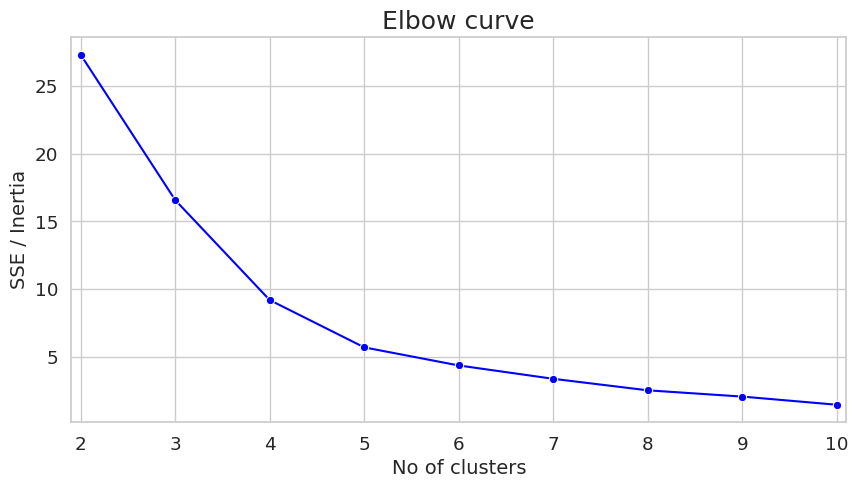

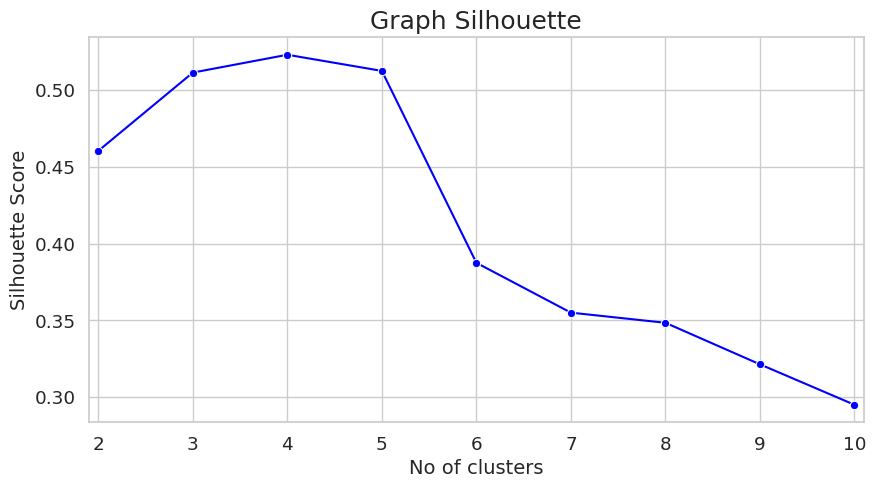

In [ ]:
cluster1 = data1[['Jumlah DBD', 'Tahun']]


# ============= DATA TRANSFORMATION ============== #
# preprocessing numerical

scaler = StandardScaler()
Num_features = cluster1.select_dtypes(include=['int64','float64']).columns
scaler.fit(cluster1[Num_features])
cluster1[Num_features] = scaler.transform(cluster1[Num_features])


#OPTIONAL: Elbow plot with inertia
#Elbow method to choose the optimal number of clusters
# # ============= Function for plotting elbow curve =============== #
def plot_elbow_curve_k_means(start, end, data):
  sse = {}
  score = {}

  for k in (range(start, end+1)):
    kmeans = KMeans(n_clusters=k, random_state=9)
    preds = kmeans.fit_predict(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    score[k] = (round(silhouette_score(data, preds),4))
    print("For n_clusters = {}, silhouette score is {}".format(k, round(silhouette_score(data, preds), 4)))
    print("For n_clusters = {}, SSE is {}".format(k, round(kmeans.inertia_, 4)))

  sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)

  plt.figure(figsize=(10, 5))
  ax = sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker="o", dashes=False, color="blue")
  ax.set_title('Elbow curve', fontsize=18)
  ax.set_xlabel('No of clusters', fontsize=14)
  ax.set_ylabel('SSE / Inertia', fontsize=14)
  ax.set(xlim=(start-0.1, end+0.1))
  plt.plot()

  plt.figure(figsize=(10, 5))
  ax = sns.lineplot(x=list(score.keys()), y=list(score.values()), marker="o", dashes=False, color="blue")
  ax.set_title('Graph Silhouette', fontsize=18)
  ax.set_xlabel('No of clusters', fontsize=14)
  ax.set_ylabel('Silhouette Score', fontsize=14)
  ax.set(xlim=(start-0.1, end+0.1))
  plt.plot()

# Plotting elbow curve for k=2 to k=10
plot_elbow_curve_k_means(2,10,cluster1)

In [ ]:
#Actual Clustering
kmeans = KMeans(n_clusters=4, random_state=9)
preds = kmeans.fit_predict(cluster1)

pd.Series(kmeans.labels_).value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3    14
1     4
2     3
0     2
dtype: int64

In [ ]:
#new column for cluster labels associated with each subject
cluster1['labels'] = kmeans.labels_
cluster1['Cluster'] = cluster1['labels'].map({0:'First', 1:'Second',2:'Third',3: 'Fourth'})

# Order the cluster
cluster1['Cluster'] = cluster1['Cluster'].astype('category')
cluster1['Cluster'] = cluster1['Cluster'].cat.reorder_categories(['First','Second','Third', 'Fourth'])

#============== INVERSE TRANSFORMATION FOR NUMERIC DATA ================#

cluster1[Num_features] = scaler.inverse_transform(cluster1[Num_features])

#=============== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ================#
dict_cat = {}
dict_num = {}

for cat in cluster1.select_dtypes('object'):
  dict_cat[cat] = lambda x: x.value_counts().index[0]

for num in cluster1.select_dtypes(['int64','float64']):
  dict_num[num] = ['mean']

#============ CREATE TABLE FOR EACH CLUSTER ============#

cluster1.rename(columns = {'labels':'Total'}, inplace = True)
data_percluster = cluster1.groupby('Cluster').agg({

        'Total':'count',
        **dict_num,
        **dict_cat

}).T

data_percluster

<ipython-input-179-e6921bb9137f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['labels'] = kmeans.labels_
<ipython-input-179-e6921bb9137f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['Cluster'] = cluster1['labels'].map({0:'First', 1:'Second',2:'Third',3: 'Fourth'})
<ipython-input-179-e6921bb9137f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,Cluster,First,Second,Third,Fourth
Total,count,2.0,4.000000,3.000000,14.000000
Jumlah DBD,mean,1.0,7.750000,2.666667,1.571429
Tahun,mean,11.0,24.255556,33.472222,22.678571


In [ ]:
cluster1[cluster1['Cluster']== 'First']

,Jumlah DBD,Tahun,Total,Cluster
Galesong Utara (Takalar),1.0,7.0,0,First
Tallo (Makassar),1.0,15.0,0,First


In [ ]:
cluster1[cluster1['Cluster']== 'Second']

,Jumlah DBD,Tahun,Total,Cluster
Manggala (Makassar),6.0,22.000000,1,Second
Rappocini (Makassar),9.0,21.222222,1,Second
Tamalanrea (Makassar),5.0,25.800000,1,Second
Tamalate (Makassar),11.0,28.000000,1,Second


In [ ]:
cluster1[cluster1['Cluster']== 'Third']

,Jumlah DBD,Tahun,Total,Cluster
Biringkanaya (Makassar),3.0,34.666667,2,Third
Gowa (Gowa),1.0,34.000000,2,Third
Somba Opu (Gowa),4.0,31.750000,2,Third


In [ ]:
cluster1[cluster1['Cluster']== 'Fourth']

,Jumlah DBD,Tahun,Total,Cluster
Bangkala (Jeneponto),1.0,19.0,3,Fourth
Bonto Duri (Makassar),1.0,21.0,3,Fourth
Bontomarannu (Gowa),2.0,23.0,3,Fourth
Borongbulo (Gowa),1.0,23.0,3,Fourth
Ma'rang (Pangkep),1.0,22.0,3,Fourth
Mamajang (Makassar),2.0,27.0,3,Fourth
Mariso (Makassar),4.0,21.0,3,Fourth
Moncongloe (Maros),1.0,23.0,3,Fourth
Pallangga (Gowa),2.0,22.0,3,Fourth
Panakkukang (Makassar),2.0,20.0,3,Fourth


In [ ]:
cluster1

,Jumlah DBD,Tahun,Total,Cluster
Bangkala (Jeneponto),1.0,19.000000,3,Fourth
Biringkanaya (Makassar),3.0,34.666667,2,Third
Bonto Duri (Makassar),1.0,21.000000,3,Fourth
Bontomarannu (Gowa),2.0,23.000000,3,Fourth
Borongbulo (Gowa),1.0,23.000000,3,Fourth
Galesong Utara (Takalar),1.0,7.000000,0,First
Gowa (Gowa),1.0,34.000000,2,Third
Ma'rang (Pangkep),1.0,22.000000,3,Fourth
Mamajang (Makassar),2.0,27.000000,3,Fourth
Manggala (Makassar),6.0,22.000000,1,Second


In [ ]:
cluster1_test = data1[['Jumlah DBD', 'Tahun']]


# ============= DATA TRANSFORMATION ============== #
# preprocessing numerical

scaler = StandardScaler()
Num_features = cluster1_test.select_dtypes(include=['int64','float64']).columns
scaler.fit(cluster1_test[Num_features])
cluster1_test[Num_features] = scaler.transform(cluster1_test[Num_features])
cluster1_test

<ipython-input-185-4129524d26af>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1_test[Num_features] = scaler.transform(cluster1_test[Num_features])


,Jumlah DBD,Tahun
Bangkala (Jeneponto),-0.654420,-0.759816
Biringkanaya (Makassar),0.098163,1.979729
Bonto Duri (Makassar),-0.654420,-0.410087
Bontomarannu (Gowa),-0.278128,-0.060358
Borongbulo (Gowa),-0.654420,-0.060358
Galesong Utara (Takalar),-0.654420,-2.858192
Gowa (Gowa),-0.654420,1.863153
Ma'rang (Pangkep),-0.654420,-0.235222
Mamajang (Makassar),-0.278128,0.639101
Manggala (Makassar),1.227037,-0.235222


[[ 2.0305436  -2.1990356 ]
 [-1.6820507  -0.8201533 ]
 [ 0.35228375  2.1451554 ]
 [ 1.9539887  -2.397398  ]]


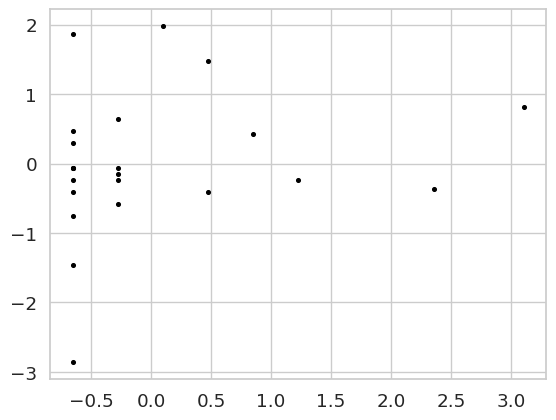

In [ ]:
# Getting the values and plotting it
f1 = cluster1_test['Jumlah DBD'].values
f2 = cluster1_test['Tahun'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1,f2 ,c='black', s=7)

# Number of clusters
k = 4
# X coordinates of random centroids
C_x = np.random.uniform(np.min(X), np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.uniform(np.min(X), np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

In [ ]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

# Assigning each value to its closest cluster
# jarak = []
for i in range(len(X)):
  distances = dist(X[i], C)
  cluster = np.argmin(distances)
  clusters[i] = cluster
  print(distances)

[3.04637189 1.02940052 3.07446143 3.07984896]
[4.6039299  3.31790642 0.30322134 4.75429613]
[3.22635496 1.10642632 2.74640067 3.27920729]
[3.14704772 1.59633539 2.29384142 3.23173385]
[3.43263339 1.27801174 2.42440534 3.50222106]
[2.76469091 2.28246027 5.10361966 2.64879717]
[4.86933306 2.87335285 1.04545583 4.99560697]
[3.32649839 1.18244195 2.58450214 3.3880376 ]
[3.65854942 2.02494924 1.63267291 3.76864307]
[2.12183511 2.96731161 2.53601913 2.28110961]
[2.37102303 2.19514669 2.55816144 2.47758473]
[3.43263339 1.27801174 2.42440534 3.50222106]
[3.03092872 1.52090159 2.46244157 3.10762773]
[2.81695469 1.42348775 2.80194654 2.8752928 ]
[3.78180446 1.64489533 1.95932199 3.87204657]
[1.85654098 4.06284091 3.21663069 2.06564907]
[3.98510842 3.14546927 0.68640779 4.14047412]
[2.78500907 1.21016572 3.74237479 2.77197962]
[2.88095059 2.82419905 1.78682716 3.03432975]
[3.20002393 5.06158779 3.06084428 3.41258527]
[3.08829641 1.55662126 2.3780284  3.16908227]
[3.66076477 1.51230613 2.11125246 

In [ ]:
from copy import deepcopy
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
iter = 0
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster

    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    iter += 1
    # print('error : ', error)
    print('iteration :', iter)
    # print('previous centroid : \n', C_old)
    print('centroid : \n', C, '\n')

    if iter == 5:
      break

iteration : 1
centroid : 
 [[ 1.7914747  -0.30322537]
 [-0.47881728 -0.43923116]
 [ 0.599885    1.1991531 ]
 [        nan         nan]] 

iteration : 2
centroid : 
 [[           nan            nan]
 [           nan            nan]
 [           nan            nan]
 [-7.7232907e-17 -1.2278825e-16]] 

iteration : 3
centroid : 
 [[-7.7232907e-17 -1.2278825e-16]
 [           nan            nan]
 [           nan            nan]
 [           nan            nan]] 

iteration : 4
centroid : 
 [[           nan            nan]
 [-7.7232907e-17 -1.2278825e-16]
 [           nan            nan]
 [           nan            nan]] 

iteration : 5
centroid : 
 [[-7.7232907e-17 -1.2278825e-16]
 [           nan            nan]
 [           nan            nan]
 [           nan            nan]] 



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Clustering berdasarkan Persentase Gizi

In [ ]:
cluster2 = data1[['Persentase status gizi baik', 'Persentase status gizi lebih', 'Persentase status gizi kurang']]

# ============= DATA TRANSFORMATION ============== #
# preprocessing numerical

scaler = StandardScaler()
Num_features = cluster2.select_dtypes(include=['int64','float64']).columns
scaler.fit(cluster2[Num_features])
cluster2[Num_features] = scaler.transform(cluster2[Num_features])

<ipython-input-189-d773e05b5ff7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2[Num_features] = scaler.transform(cluster2[Num_features])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For n_clusters = 2, silhouette score is 0.5875
For n_clusters = 2, SSE is 33.0438
For n_clusters = 3, silhouette score is 0.7606
For n_clusters = 3, SSE is 8.5803
For n_clusters = 4, silhouette score is 0.6922
For n_clusters = 4, SSE is 4.6123
For n_clusters = 5, silhouette score is 0.7539
For n_clusters = 5, SSE is 1.4186
For n_clusters = 6, silhouette score is 0.8662
For n_clusters = 6, SSE is 0.2088
For n_clusters = 7, silhouette score is 0.8735
For n_clusters = 7, SSE is 0.0205
For n_clusters = 8, silhouette score is 0.8181
For n_clusters = 8, SSE is 0.0043
For n_clusters = 9, silhouette score is 0.7701
For n_clusters = 9, SSE is 0.0014


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.7391
For n_clusters = 10, SSE is 0.0


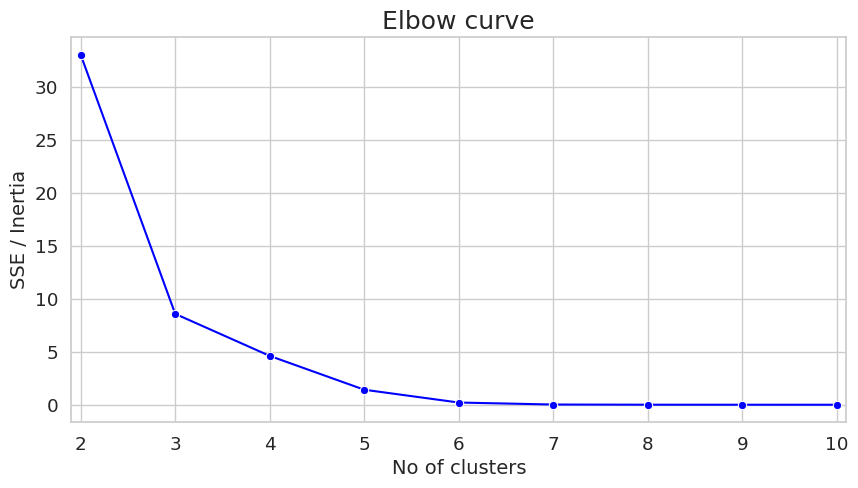

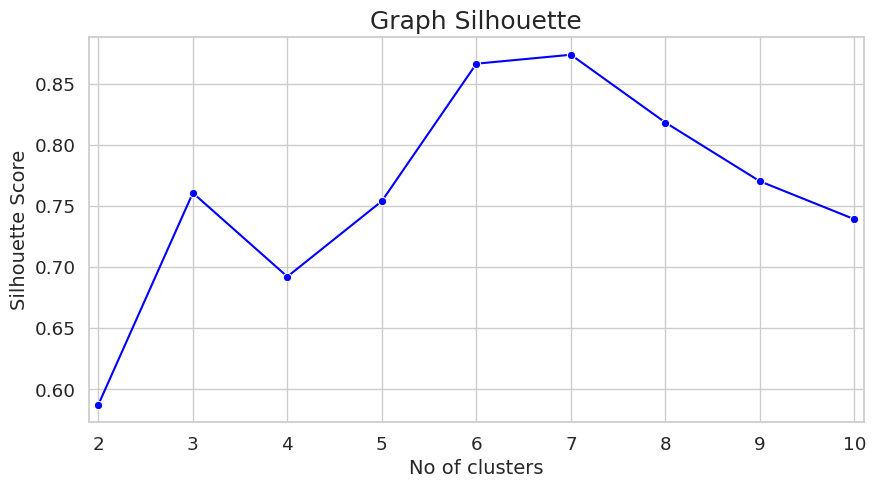

In [ ]:
#OPTIONAL: Elbow plot with inertia
#Elbow method to choose the optimal number of clusters
# # ============= Function for plotting elbow curve =============== #
def plot_elbow_curve_k_means(start, end, data):
  sse = {}
  score = {}

  for k in (range(start, end+1)):
    kmeans = KMeans(n_clusters=k, random_state=9)
    preds = kmeans.fit_predict(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    score[k] = (round(silhouette_score(data, preds),4))
    print("For n_clusters = {}, silhouette score is {}".format(k, round(silhouette_score(data, preds), 4)))
    print("For n_clusters = {}, SSE is {}".format(k, round(kmeans.inertia_, 4)))


  sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)

  plt.figure(figsize=(10, 5))
  ax = sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker="o", dashes=False, color="blue")
  ax.set_title('Elbow curve', fontsize=18)
  ax.set_xlabel('No of clusters', fontsize=14)
  ax.set_ylabel('SSE / Inertia', fontsize=14)
  ax.set(xlim=(start-0.1, end+0.1))
  plt.plot()

  plt.figure(figsize=(10, 5))
  ax = sns.lineplot(x=list(score.keys()), y=list(score.values()), marker="o", dashes=False, color="blue")
  ax.set_title('Graph Silhouette', fontsize=18)
  ax.set_xlabel('No of clusters', fontsize=14)
  ax.set_ylabel('Silhouette Score', fontsize=14)
  ax.set(xlim=(start-0.1, end+0.1))
  plt.plot()

# Plotting elbow curve for k=2 to k=10
plot_elbow_curve_k_means(2,10,cluster2)

In [ ]:
#Actual Clustering
kmeans = KMeans(n_clusters=3, random_state=9)
preds = kmeans.fit_predict(cluster2)

pd.Series(kmeans.labels_).value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    15
0     5
2     3
dtype: int64

In [ ]:
#new column for cluster labels associated with each subject
cluster2['labels'] = kmeans.labels_
cluster2['Cluster'] = cluster2['labels'].map({0:'First', 1:'Second',2:'Third'})

# Order the cluster
cluster2['Cluster'] = cluster2['Cluster'].astype('category')
cluster2['Cluster'] = cluster2['Cluster'].cat.reorder_categories(['First','Second','Third'])

#============== INVERSE TRANSFORMATION FOR NUMERIC DATA ================#

cluster2[Num_features] = scaler.inverse_transform(cluster2[Num_features])

<ipython-input-192-668d2ae48089>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['labels'] = kmeans.labels_
<ipython-input-192-668d2ae48089>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['Cluster'] = cluster2['labels'].map({0:'First', 1:'Second',2:'Third'})
<ipython-input-192-668d2ae48089>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [ ]:
#=============== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ================#
dict_cat = {}
dict_num = {}

for cat in cluster2.select_dtypes('object'):
  dict_cat[cat] = lambda x: x.value_counts().index[0]

for num in cluster2.select_dtypes(['int64','float64']):
  # dict_num[num] = ['mean', 'median', 'min', 'max']
  dict_num[num] = ['mean']

#============ CREATE TABLE FOR EACH CLUSTER ============#

cluster2.rename(columns = {'labels':'Total'}, inplace = True)
data_percluster = cluster2.groupby('Cluster').agg({

        'Total':'count',
        **dict_num,
        **dict_cat

}).T

data_percluster

<ipython-input-193-e155ae3bfe27>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2.rename(columns = {'labels':'Total'}, inplace = True)


,Cluster,First,Second,Third
Total,count,5.0,15.000000,3.000000
Persentase status gizi baik,mean,0.0,85.973064,0.000000
Persentase status gizi lebih,mean,100.0,14.026936,16.666667
Persentase status gizi kurang,mean,0.0,0.000000,83.333333


In [ ]:
cluster2[cluster2['Cluster']== 'First']

,Persentase status gizi baik,Persentase status gizi lebih,Persentase status gizi kurang,Total,Cluster
Bontomarannu (Gowa),0.0,100.0,0.0,0,First
Borongbulo (Gowa),0.0,100.0,0.0,0,First
Galesong Utara (Takalar),0.0,100.0,0.0,0,First
Gowa (Gowa),0.0,100.0,0.0,0,First
Ujung Pandang (Makassar),0.0,100.0,0.0,0,First


In [ ]:
cluster2[cluster2['Cluster']== 'Second']

,Persentase status gizi baik,Persentase status gizi lebih,Persentase status gizi kurang,Total,Cluster
Bangkala (Jeneponto),100.000000,0.000000,0.0,1,Second
Biringkanaya (Makassar),66.666667,33.333333,0.0,1,Second
Ma'rang (Pangkep),100.000000,0.000000,0.0,1,Second
Manggala (Makassar),83.333333,16.666667,0.0,1,Second
Mariso (Makassar),50.000000,50.000000,0.0,1,Second
Moncongloe (Maros),100.000000,0.000000,0.0,1,Second
Pallangga (Gowa),50.000000,50.000000,0.0,1,Second
Panakkukang (Makassar),100.000000,0.000000,0.0,1,Second
Pattalasang (Takalar),100.000000,0.000000,0.0,1,Second
Rappocini (Makassar),77.777778,22.222222,0.0,1,Second


In [ ]:
cluster2[cluster2['Cluster']== 'Third']

,Persentase status gizi baik,Persentase status gizi lebih,Persentase status gizi kurang,Total,Cluster
Bonto Duri (Makassar),0.0,0.0,100.0,2,Third
Mamajang (Makassar),0.0,50.0,50.0,2,Third
Ujung Tanah (Makassar),0.0,0.0,100.0,2,Third


In [ ]:
cluster2

,Persentase status gizi baik,Persentase status gizi lebih,Persentase status gizi kurang,Total,Cluster
Bangkala (Jeneponto),100.000000,0.000000,0.0,1,Second
Biringkanaya (Makassar),66.666667,33.333333,0.0,1,Second
Bonto Duri (Makassar),0.000000,0.000000,100.0,2,Third
Bontomarannu (Gowa),0.000000,100.000000,0.0,0,First
Borongbulo (Gowa),0.000000,100.000000,0.0,0,First
Galesong Utara (Takalar),0.000000,100.000000,0.0,0,First
Gowa (Gowa),0.000000,100.000000,0.0,0,First
Ma'rang (Pangkep),100.000000,0.000000,0.0,1,Second
Mamajang (Makassar),0.000000,50.000000,50.0,2,Third
Manggala (Makassar),83.333333,16.666667,0.0,1,Second


# Clustering berdasarkan Pendapatan Orang Tua

In [ ]:
cluster3 = data1[['Pendapatan ( < 2.500.000 )', 'Pendapatan ( 2.500.000 - 5.000.000 )', 'Pendapatan ( 5.000.000 - 10.000.000 )', 'Pendapatan ( > 10.000.000 )']]

# ============= DATA TRANSFORMATION ============== #
# preprocessing numerical

scaler = StandardScaler()
Num_features = cluster3.select_dtypes(include=['int64','float64']).columns
scaler.fit(cluster3[Num_features])
cluster3[Num_features] = scaler.transform(cluster3[Num_features])

<ipython-input-198-551af7d40e9b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3[Num_features] = scaler.transform(cluster3[Num_features])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For n_clusters = 2, silhouette score is 0.3073
For n_clusters = 2, SSE is 62.9102
For n_clusters = 3, silhouette score is 0.4589
For n_clusters = 3, SSE is 38.4973
For n_clusters = 4, silhouette score is 0.5576
For n_clusters = 4, SSE is 18.5988
For n_clusters = 5, silhouette score is 0.6231
For n_clusters = 5, SSE is 12.049
For n_clusters = 6, silhouette score is 0.6156
For n_clusters = 6, SSE is 8.9251
For n_clusters = 7, silhouette score is 0.6237
For n_clusters = 7, SSE is 6.4693
For n_clusters = 8, silhouette score is 0.639
For n_clusters = 8, SSE is 3.8728
For n_clusters = 9, silhouette score is 0.6268
For n_clusters = 9, SSE is 2.7339
For n_clusters = 10, silhouette score is 0.6209
For n_clusters = 10, SSE is 1.8046


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


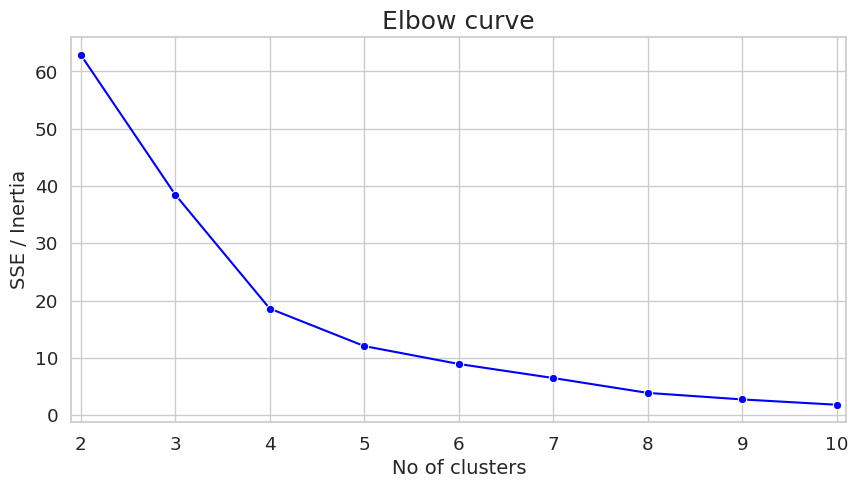

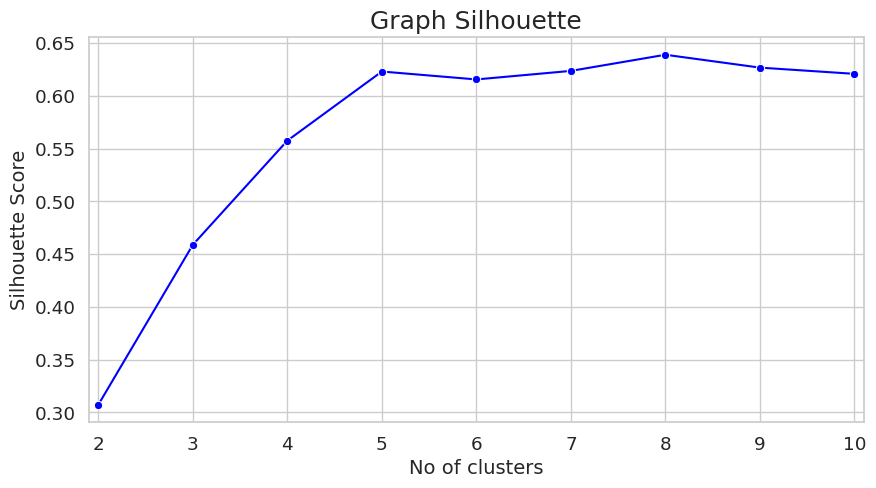

In [ ]:
#OPTIONAL: Elbow plot with inertia
#Elbow method to choose the optimal number of clusters
# # ============= Function for plotting elbow curve =============== #
def plot_elbow_curve_k_means(start, end, data):
  sse = {}
  score = {}

  for k in (range(start, end+1)):
    kmeans = KMeans(n_clusters=k, random_state=9)
    preds = kmeans.fit_predict(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    score[k] = (round(silhouette_score(data, preds),4))
    print("For n_clusters = {}, silhouette score is {}".format(k, round(silhouette_score(data, preds), 4)))
    print("For n_clusters = {}, SSE is {}".format(k, round(kmeans.inertia_, 4)))


  sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)

  plt.figure(figsize=(10, 5))
  ax = sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker="o", dashes=False, color="blue")
  ax.set_title('Elbow curve', fontsize=18)
  ax.set_xlabel('No of clusters', fontsize=14)
  ax.set_ylabel('SSE / Inertia', fontsize=14)
  ax.set(xlim=(start-0.1, end+0.1))
  plt.plot()

  plt.figure(figsize=(10, 5))
  ax = sns.lineplot(x=list(score.keys()), y=list(score.values()), marker="o", dashes=False, color="blue")
  ax.set_title('Graph Silhouette', fontsize=18)
  ax.set_xlabel('No of clusters', fontsize=14)
  ax.set_ylabel('Silhouette Score', fontsize=14)
  ax.set(xlim=(start-0.1, end+0.1))
  plt.plot()

# Plotting elbow curve for k=2 to k=10
plot_elbow_curve_k_means(2,10,cluster3)

In [ ]:
#Actual Clustering
kmeans = KMeans(n_clusters=5, random_state=9)
preds = kmeans.fit_predict(cluster3)

pd.Series(kmeans.labels_).value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4    7
1    5
3    4
0    4
2    3
dtype: int64

In [ ]:
#new column for cluster labels associated with each subject
cluster3['labels'] = kmeans.labels_
cluster3['Cluster'] = cluster3['labels'].map({0:'First', 1:'Second',2:'Third',3:'Fourth', 4:'Fifth'})

# Order the cluster
cluster3['Cluster'] = cluster3['Cluster'].astype('category')
cluster3['Cluster'] = cluster3['Cluster'].cat.reorder_categories(['First','Second','Third', 'Fourth', 'Fifth'])

#============== INVERSE TRANSFORMATION FOR NUMERIC DATA ================#

cluster3[Num_features] = scaler.inverse_transform(cluster3[Num_features])

<ipython-input-201-a22ac54b6d2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3['labels'] = kmeans.labels_
<ipython-input-201-a22ac54b6d2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3['Cluster'] = cluster3['labels'].map({0:'First', 1:'Second',2:'Third',3:'Fourth', 4:'Fifth'})
<ipython-input-201-a22ac54b6d2f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
cluster3[cluster3['Cluster']== 'First']

,Pendapatan ( < 2.500.000 ),Pendapatan ( 2.500.000 - 5.000.000 ),Pendapatan ( 5.000.000 - 10.000.000 ),Pendapatan ( > 10.000.000 ),labels,Cluster
Bonto Duri (Makassar),0.0,0.0,100.0,0.0,0,First
Borongbulo (Gowa),0.0,0.0,100.0,0.0,0,First
Ma'rang (Pangkep),0.0,0.0,100.0,0.0,0,First
Ujung Pandang (Makassar),0.0,0.0,100.0,0.0,0,First


In [ ]:
cluster3[cluster3['Cluster']== 'Second']

,Pendapatan ( < 2.500.000 ),Pendapatan ( 2.500.000 - 5.000.000 ),Pendapatan ( 5.000.000 - 10.000.000 ),Pendapatan ( > 10.000.000 ),labels,Cluster
Galesong Utara (Takalar),0.0,100.0,0.0,0.0,1,Second
Moncongloe (Maros),0.0,100.0,0.0,0.0,1,Second
Pattalasang (Takalar),0.0,100.0,0.0,0.0,1,Second
Turikale (Maros),0.0,100.0,0.0,0.0,1,Second
Ujung Tanah (Makassar),0.0,100.0,0.0,0.0,1,Second


In [ ]:
cluster3[cluster3['Cluster']== 'Third']

,Pendapatan ( < 2.500.000 ),Pendapatan ( 2.500.000 - 5.000.000 ),Pendapatan ( 5.000.000 - 10.000.000 ),Pendapatan ( > 10.000.000 ),labels,Cluster
Bangkala (Jeneponto),100.0,0.0,0.0,0.0,2,Third
Gowa (Gowa),100.0,0.0,0.0,0.0,2,Third
Tallo (Makassar),100.0,0.0,0.0,0.0,2,Third


In [ ]:
cluster3[cluster3['Cluster']== 'Fourth']

,Pendapatan ( < 2.500.000 ),Pendapatan ( 2.500.000 - 5.000.000 ),Pendapatan ( 5.000.000 - 10.000.000 ),Pendapatan ( > 10.000.000 ),labels,Cluster
Biringkanaya (Makassar),0.000000,0.000000,66.666667,33.333333,3,Fourth
Mamajang (Makassar),0.000000,50.000000,0.000000,50.000000,3,Fourth
Manggala (Makassar),16.666667,16.666667,16.666667,50.000000,3,Fourth
Panakkukang (Makassar),0.000000,0.000000,50.000000,50.000000,3,Fourth


In [ ]:
cluster3[cluster3['Cluster']== 'Fifth']

,Pendapatan ( < 2.500.000 ),Pendapatan ( 2.500.000 - 5.000.000 ),Pendapatan ( 5.000.000 - 10.000.000 ),Pendapatan ( > 10.000.000 ),labels,Cluster
Bontomarannu (Gowa),0.000000,50.000000,50.000000,0.000000,4,Fifth
Mariso (Makassar),50.000000,25.000000,0.000000,25.000000,4,Fifth
Pallangga (Gowa),50.000000,0.000000,50.000000,0.000000,4,Fifth
Rappocini (Makassar),0.000000,66.666667,22.222222,11.111111,4,Fifth
Somba Opu (Gowa),0.000000,50.000000,25.000000,25.000000,4,Fifth
Tamalanrea (Makassar),20.000000,20.000000,40.000000,20.000000,4,Fifth
Tamalate (Makassar),18.181818,36.363636,36.363636,9.090909,4,Fifth


In [ ]:
#=============== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ================#
dict_cat = {}
dict_num = {}

for cat in cluster3.select_dtypes('object'):
  dict_cat[cat] = lambda x: x.value_counts().index[0]

for num in cluster3.select_dtypes(['int64','float64']):
  # dict_num[num] = ['mean', 'median', 'min', 'max']
  dict_num[num] = ['mean']

#============ CREATE TABLE FOR EACH CLUSTER ============#

cluster3.rename(columns = {'labels':'Total'}, inplace = True)
data_percluster = cluster3.groupby('Cluster').agg({

        'Total':'count',
        **dict_num,
        **dict_cat

}).T

data_percluster

<ipython-input-207-ced389d85868>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3.rename(columns = {'labels':'Total'}, inplace = True)


,Cluster,First,Second,Third,Fourth,Fifth
Total,count,4.0,5.0,3.0,4.000000,7.000000
Pendapatan ( < 2.500.000 ),mean,0.0,0.0,100.0,4.166667,19.740260
Pendapatan ( 2.500.000 - 5.000.000 ),mean,0.0,100.0,0.0,16.666667,35.432900
Pendapatan ( 5.000.000 - 10.000.000 ),mean,100.0,0.0,0.0,33.333333,31.940837
Pendapatan ( > 10.000.000 ),mean,0.0,0.0,0.0,45.833333,12.886003


# Clustering Berdasarkan Luas Rumah

In [ ]:
cluster4 = data1[['Luas rumah ( < 36 m^2 )', 'Luas rumah ( 36 - 54 m^2 )', 'Luas rumah ( 54 - 120 m^2 )', 'Luas rumah ( > 120 m^2 )']]

# ============= DATA TRANSFORMATION ============== #
# preprocessing numerical

scaler = StandardScaler()
Num_features = cluster4.select_dtypes(include=['int64','float64']).columns
scaler.fit(cluster4[Num_features])
cluster4[Num_features] = scaler.transform(cluster4[Num_features])

<ipython-input-208-f76baf6c5431>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster4[Num_features] = scaler.transform(cluster4[Num_features])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.4539
For n_clusters = 2, SSE is 58.7219
For n_clusters = 3, silhouette score is 0.5549
For n_clusters = 3, SSE is 34.6948


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.6595
For n_clusters = 4, SSE is 13.9711


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.7084
For n_clusters = 5, SSE is 7.5963


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.729
For n_clusters = 6, SSE is 4.5499


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.7507
For n_clusters = 7, SSE is 2.1314
For n_clusters = 8, silhouette score is 0.7581
For n_clusters = 8, SSE is 1.2634


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.7451
For n_clusters = 9, SSE is 0.6033


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.7363
For n_clusters = 10, SSE is 0.2875


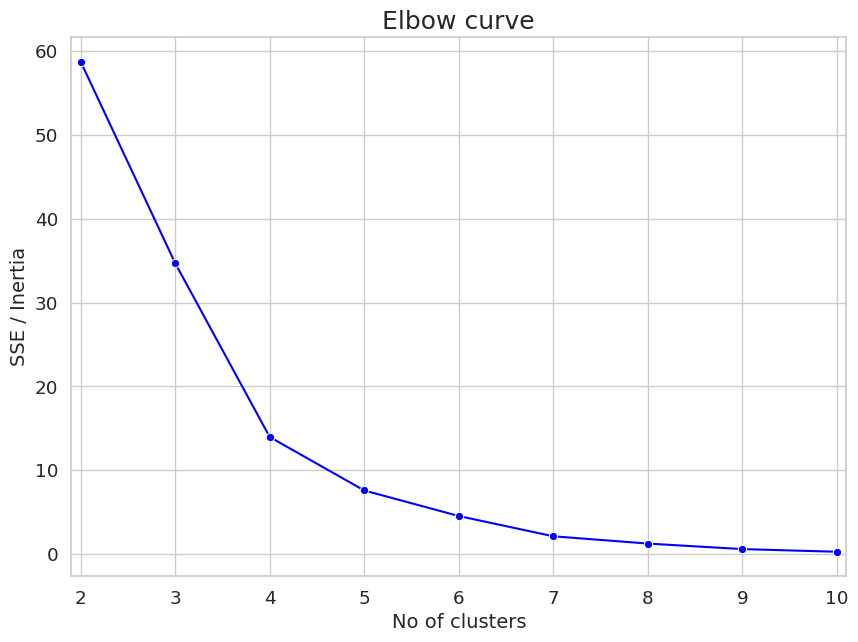

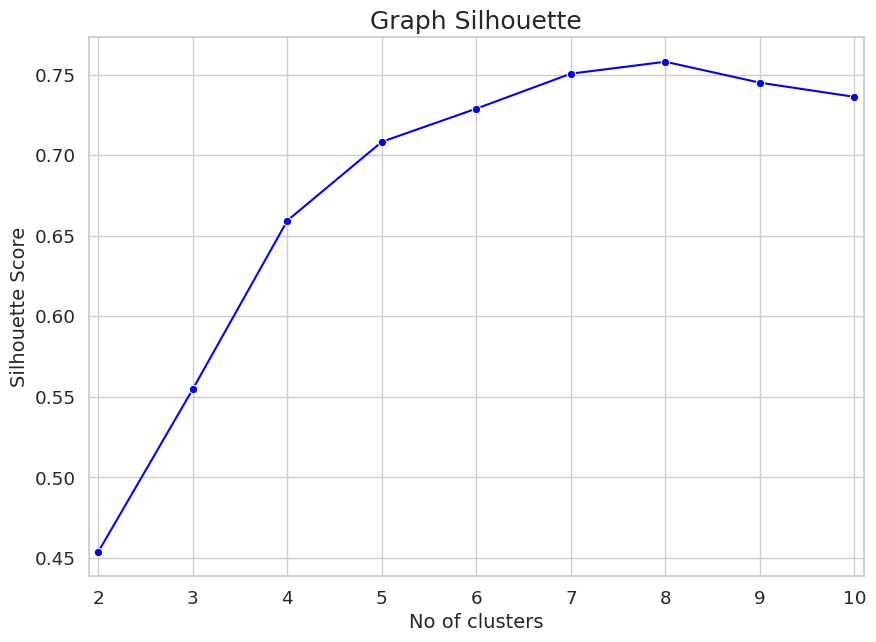

In [ ]:
#OPTIONAL: Elbow plot with inertia
#Elbow method to choose the optimal number of clusters
# # ============= Function for plotting elbow curve =============== #
def plot_elbow_curve_k_means(start, end, data):
  sse = {}
  score = {}

  for k in (range(start, end+1)):
    kmeans = KMeans(n_clusters=k, random_state=9)
    preds = kmeans.fit_predict(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    score[k] = (round(silhouette_score(data, preds),4))
    print("For n_clusters = {}, silhouette score is {}".format(k, round(silhouette_score(data, preds), 4)))
    print("For n_clusters = {}, SSE is {}".format(k, round(kmeans.inertia_, 4)))


  sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)

  plt.figure(figsize=(10, 7))
  ax = sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker="o", dashes=False, color="blue")
  ax.set_title('Elbow curve', fontsize=18)
  ax.set_xlabel('No of clusters', fontsize=14)
  ax.set_ylabel('SSE / Inertia', fontsize=14)
  ax.set(xlim=(start-0.1, end+0.1))
  plt.plot()

  plt.figure(figsize=(10, 7))
  ax = sns.lineplot(x=list(score.keys()), y=list(score.values()), marker="o", dashes=False, color="blue")
  ax.set_title('Graph Silhouette', fontsize=18)
  ax.set_xlabel('No of clusters', fontsize=14)
  ax.set_ylabel('Silhouette Score', fontsize=14)
  ax.set(xlim=(start-0.1, end+0.1))
  plt.plot()

# Plotting elbow curve for k=2 to k=10
plot_elbow_curve_k_means(2,10,cluster4)

In [ ]:
#Actual Clustering
kmeans = KMeans(n_clusters=4,random_state=9)
preds = kmeans.fit_predict(cluster4)

pd.Series(kmeans.labels_).value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    8
2    7
1    6
3    2
dtype: int64

In [ ]:
#new column for cluster labels associated with each subject
cluster4['labels'] = kmeans.labels_
cluster4['Cluster'] = cluster4['labels'].map({0:'First', 1:'Second',2:'Third',3:'Fourth'})

# Order the cluster
cluster4['Cluster'] = cluster4['Cluster'].astype('category')
cluster4['Cluster'] = cluster4['Cluster'].cat.reorder_categories(['First','Second','Third','Fourth'])

#============== INVERSE TRANSFORMATION FOR NUMERIC DATA ================#

cluster4[Num_features] = scaler.inverse_transform(cluster4[Num_features])

<ipython-input-211-b0aa2a75dac1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster4['labels'] = kmeans.labels_
<ipython-input-211-b0aa2a75dac1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster4['Cluster'] = cluster4['labels'].map({0:'First', 1:'Second',2:'Third',3:'Fourth'})
<ipython-input-211-b0aa2a75dac1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
#=============== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ================#
dict_cat = {}
dict_num = {}

for cat in cluster4.select_dtypes('object'):
  dict_cat[cat] = lambda x: x.value_counts().index[0]

for num in cluster4.select_dtypes(['int64','float64']):
  # dict_num[num] = ['mean', 'median', 'min', 'max']
  dict_num[num] = ['mean']

#============ CREATE TABLE FOR EACH CLUSTER ============#

cluster4.rename(columns = {'labels':'Total'}, inplace = True)
data_percluster = cluster4.groupby('Cluster').agg({

        'Total':'count',
        **dict_num,
        **dict_cat

}).T

data_percluster

<ipython-input-212-9430e5bfda58>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster4.rename(columns = {'labels':'Total'}, inplace = True)


,Cluster,First,Second,Third,Fourth
Total,count,8.000000,6.0,7.000000,2.0
Luas rumah ( < 36 m^2 ),mean,2.272727,0.0,67.857143,0.0
Luas rumah ( 36 - 54 m^2 ),mean,17.941919,100.0,0.000000,0.0
Luas rumah ( 54 - 120 m^2 ),mean,71.010101,0.0,28.571429,0.0
Luas rumah ( > 120 m^2 ),mean,8.775253,0.0,3.571429,100.0


In [ ]:
cluster4[cluster4['Cluster']== 'First']

,Luas rumah ( < 36 m^2 ),Luas rumah ( 36 - 54 m^2 ),Luas rumah ( 54 - 120 m^2 ),Luas rumah ( > 120 m^2 ),Total,Cluster
Biringkanaya (Makassar),0.000000,33.333333,66.666667,0.000000,0,First
Bontomarannu (Gowa),0.000000,0.000000,50.000000,50.000000,0,First
Galesong Utara (Takalar),0.000000,0.000000,100.000000,0.000000,0,First
Manggala (Makassar),0.000000,16.666667,83.333333,0.000000,0,First
Rappocini (Makassar),0.000000,44.444444,44.444444,11.111111,0,First
Tamalanrea (Makassar),0.000000,40.000000,60.000000,0.000000,0,First
Tamalate (Makassar),18.181818,9.090909,63.636364,9.090909,0,First
Ujung Pandang (Makassar),0.000000,0.000000,100.000000,0.000000,0,First


In [ ]:
cluster4[cluster4['Cluster']== 'Second']

,Luas rumah ( < 36 m^2 ),Luas rumah ( 36 - 54 m^2 ),Luas rumah ( 54 - 120 m^2 ),Luas rumah ( > 120 m^2 ),Total,Cluster
Bonto Duri (Makassar),0.0,100.0,0.0,0.0,1,Second
Borongbulo (Gowa),0.0,100.0,0.0,0.0,1,Second
Gowa (Gowa),0.0,100.0,0.0,0.0,1,Second
Tallo (Makassar),0.0,100.0,0.0,0.0,1,Second
Turikale (Maros),0.0,100.0,0.0,0.0,1,Second
Ujung Tanah (Makassar),0.0,100.0,0.0,0.0,1,Second


In [ ]:
cluster4[cluster4['Cluster']== 'Third']

,Luas rumah ( < 36 m^2 ),Luas rumah ( 36 - 54 m^2 ),Luas rumah ( 54 - 120 m^2 ),Luas rumah ( > 120 m^2 ),Total,Cluster
Bangkala (Jeneponto),100.0,0.0,0.0,0.0,2,Third
Mamajang (Makassar),50.0,0.0,50.0,0.0,2,Third
Mariso (Makassar),75.0,0.0,0.0,25.0,2,Third
Moncongloe (Maros),100.0,0.0,0.0,0.0,2,Third
Pallangga (Gowa),50.0,0.0,50.0,0.0,2,Third
Panakkukang (Makassar),50.0,0.0,50.0,0.0,2,Third
Somba Opu (Gowa),50.0,0.0,50.0,0.0,2,Third


In [ ]:
cluster4[cluster4['Cluster']== 'Fourth']

,Luas rumah ( < 36 m^2 ),Luas rumah ( 36 - 54 m^2 ),Luas rumah ( 54 - 120 m^2 ),Luas rumah ( > 120 m^2 ),Total,Cluster
Ma'rang (Pangkep),0.0,0.0,0.0,100.0,3,Fourth
Pattalasang (Takalar),0.0,0.0,0.0,100.0,3,Fourth


# Clustering Berdasarkan Lingkungan Rumah

In [ ]:
cluster5 = data1[['Jumlah DBD', 'jumlah kamar', 'jumlah orang', 'genangan air sekitar']]

# ============= DATA TRANSFORMATION ============== #
# preprocessing numerical

scaler = StandardScaler()
Num_features = cluster5.select_dtypes(include=['int64','float64']).columns
scaler.fit(cluster5[Num_features])
cluster5[Num_features] = scaler.transform(cluster5[Num_features])

<ipython-input-217-4496ef2e0ba0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster5[Num_features] = scaler.transform(cluster5[Num_features])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For n_clusters = 2, silhouette score is 0.2608
For n_clusters = 2, SSE is 64.6466
For n_clusters = 3, silhouette score is 0.3042
For n_clusters = 3, SSE is 45.2803
For n_clusters = 4, silhouette score is 0.2873
For n_clusters = 4, SSE is 36.775
For n_clusters = 5, silhouette score is 0.2847
For n_clusters = 5, SSE is 29.1909
For n_clusters = 6, silhouette score is 0.3207
For n_clusters = 6, SSE is 21.2452
For n_clusters = 7, silhouette score is 0.3332
For n_clusters = 7, SSE is 16.5229
For n_clusters = 8, silhouette score is 0.3414
For n_clusters = 8, SSE is 12.6816
For n_clusters = 9, silhouette score is 0.3476
For n_clusters = 9, SSE is 9.7992


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.3413
For n_clusters = 10, SSE is 7.8186


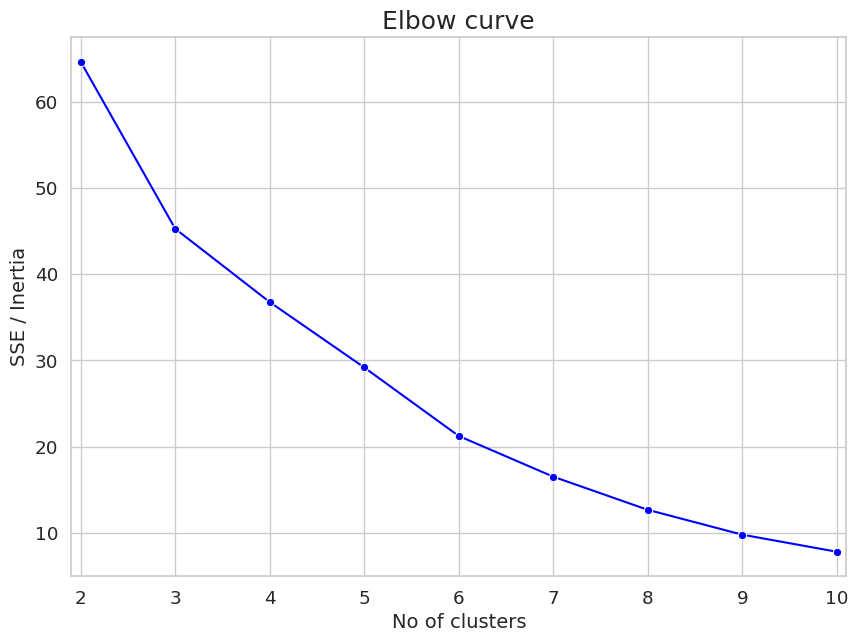

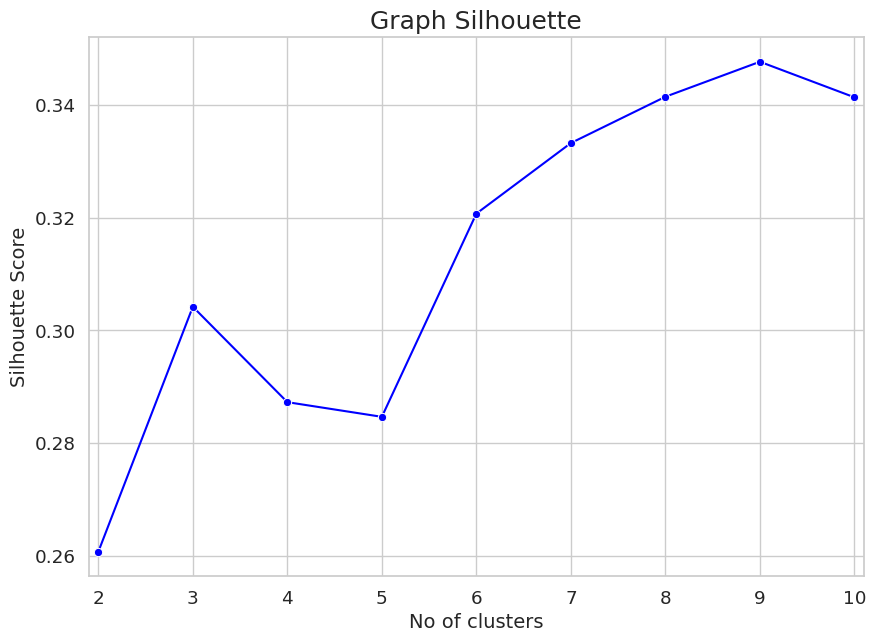

In [ ]:
#OPTIONAL: Elbow plot with inertia
#Elbow method to choose the optimal number of clusters
# # ============= Function for plotting elbow curve =============== #
def plot_elbow_curve_k_means(start, end, data):
  sse = {}
  score = {}

  for k in (range(start, end+1)):
    kmeans = KMeans(n_clusters=k, random_state=9)
    preds = kmeans.fit_predict(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    score[k] = (round(silhouette_score(data, preds),4))
    print("For n_clusters = {}, silhouette score is {}".format(k, round(silhouette_score(data, preds), 4)))
    print("For n_clusters = {}, SSE is {}".format(k, round(kmeans.inertia_, 4)))


  sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)

  plt.figure(figsize=(10, 7))
  ax = sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker="o", dashes=False, color="blue")
  ax.set_title('Elbow curve', fontsize=18)
  ax.set_xlabel('No of clusters', fontsize=14)
  ax.set_ylabel('SSE / Inertia', fontsize=14)
  ax.set(xlim=(start-0.1, end+0.1))
  plt.plot()

  plt.figure(figsize=(10, 7))
  ax = sns.lineplot(x=list(score.keys()), y=list(score.values()), marker="o", dashes=False, color="blue")
  ax.set_title('Graph Silhouette', fontsize=18)
  ax.set_xlabel('No of clusters', fontsize=14)
  ax.set_ylabel('Silhouette Score', fontsize=14)
  ax.set(xlim=(start-0.1, end+0.1))
  plt.plot()

# Plotting elbow curve for k=2 to k=10
plot_elbow_curve_k_means(2,10,cluster5)

In [ ]:
#Actual Clustering
kmeans = KMeans(n_clusters=6,random_state=9)
preds = kmeans.fit_predict(cluster5)

pd.Series(kmeans.labels_).value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4    6
2    5
5    4
1    4
3    3
0    1
dtype: int64

In [ ]:
#new column for cluster labels associated with each subject
cluster5['labels'] = kmeans.labels_
cluster5['Cluster'] = cluster5['labels'].map({0:'First', 1:'Second',2:'Third',3:'Fourth', 4:'Fifth', 5:'Sixth'})

# Order the cluster
cluster5['Cluster'] = cluster5['Cluster'].astype('category')
cluster5['Cluster'] = cluster5['Cluster'].cat.reorder_categories(['First','Second','Third','Fourth','Fifth','Sixth'])

#============== INVERSE TRANSFORMATION FOR NUMERIC DATA ================#

cluster5[Num_features] = scaler.inverse_transform(cluster5[Num_features])

<ipython-input-220-2ad55da9550b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster5['labels'] = kmeans.labels_
<ipython-input-220-2ad55da9550b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster5['Cluster'] = cluster5['labels'].map({0:'First', 1:'Second',2:'Third',3:'Fourth', 4:'Fifth', 5:'Sixth'})
<ipython-input-220-2ad55da9550b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
#=============== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ================#
dict_cat = {}
dict_num = {}

for cat in cluster5.select_dtypes('object'):
  dict_cat[cat] = lambda x: x.value_counts().index[0]

for num in cluster5.select_dtypes(['int64','float64']):
  # dict_num[num] = ['mean', 'median', 'min', 'max']
  dict_num[num] = ['mean']

#============ CREATE TABLE FOR EACH CLUSTER ============#

cluster5.rename(columns = {'labels':'Total'}, inplace = True)
data_percluster = cluster5.groupby('Cluster').agg({

        'Total':'count',
        **dict_num,
        **dict_cat

}).T

data_percluster

<ipython-input-221-e0aeb52981af>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster5.rename(columns = {'labels':'Total'}, inplace = True)


,Cluster,First,Second,Third,Fourth,Fifth,Sixth
Total,count,1.0,4.0000,5.000000,3.000000,6.0,4.0000
Jumlah DBD,mean,1.0,2.5000,2.400000,8.666667,1.0,2.0000
jumlah kamar,mean,5.0,2.6875,4.566667,3.774411,2.5,2.9375
jumlah orang,mean,6.0,3.8750,5.820000,5.139731,4.5,6.5625
genangan air sekitar,mean,0.0,43.7500,93.333333,42.424242,100.0,87.5000


In [ ]:
cluster5[cluster5['Cluster']== 'First']

,Jumlah DBD,jumlah kamar,jumlah orang,genangan air sekitar,Total,Cluster
Bonto Duri (Makassar),1.0,5.0,6.0,0.0,0,First


In [ ]:
cluster5[cluster5['Cluster']== 'Second']

,Jumlah DBD,jumlah kamar,jumlah orang,genangan air sekitar,Total,Cluster
Mamajang (Makassar),2.0,3.00,4.0,50.0,1,Second
Pallangga (Gowa),2.0,2.50,4.0,50.0,1,Second
Panakkukang (Makassar),2.0,2.50,3.0,0.0,1,Second
Somba Opu (Gowa),4.0,2.75,4.5,75.0,1,Second


In [ ]:
cluster5[cluster5['Cluster']== 'Third']

,Jumlah DBD,jumlah kamar,jumlah orang,genangan air sekitar,Total,Cluster
Biringkanaya (Makassar),3.0,4.333333,5.0,66.666667,2,Third
Bontomarannu (Gowa),2.0,4.500000,5.5,100.000000,2,Third
Ma'rang (Pangkep),1.0,5.000000,7.0,100.000000,2,Third
Tamalanrea (Makassar),5.0,4.000000,5.6,100.000000,2,Third
Ujung Pandang (Makassar),1.0,5.000000,6.0,100.000000,2,Third


In [ ]:
cluster5[cluster5['Cluster']== 'Fourth']

,Jumlah DBD,jumlah kamar,jumlah orang,genangan air sekitar,Total,Cluster
Manggala (Makassar),6.0,3.666667,5.500000,66.666667,3,Fourth
Rappocini (Makassar),9.0,4.111111,5.555556,33.333333,3,Fourth
Tamalate (Makassar),11.0,3.545455,4.363636,27.272727,3,Fourth


In [ ]:
cluster5[cluster5['Cluster']== 'Fifth']

,Jumlah DBD,jumlah kamar,jumlah orang,genangan air sekitar,Total,Cluster
Bangkala (Jeneponto),1.0,4.0,4.0,100.0,4,Fifth
Borongbulo (Gowa),1.0,2.0,4.0,100.0,4,Fifth
Gowa (Gowa),1.0,2.0,5.0,100.0,4,Fifth
Moncongloe (Maros),1.0,2.0,5.0,100.0,4,Fifth
Pattalasang (Takalar),1.0,2.0,4.0,100.0,4,Fifth
Ujung Tanah (Makassar),1.0,3.0,5.0,100.0,4,Fifth


In [ ]:
cluster5[cluster5['Cluster']== 'Sixth']

,Jumlah DBD,jumlah kamar,jumlah orang,genangan air sekitar,Total,Cluster
Galesong Utara (Takalar),1.0,3.00,7.00,100.0,5,Sixth
Mariso (Makassar),4.0,2.75,6.25,50.0,5,Sixth
Tallo (Makassar),1.0,3.00,6.00,100.0,5,Sixth
Turikale (Maros),2.0,3.00,7.00,100.0,5,Sixth


# Clustering Persentase pernah Vaksin CYD dan Persentase Kasus dengan Riwayat DBD serumah

In [ ]:
cluster6 = data1[['riwayat vaksin CYD', 'Persentase kasus dengan riwayat DBD serumah']]

# ============= DATA TRANSFORMATION ============== #
# preprocessing numerical

scaler = StandardScaler()
Num_features = cluster6.select_dtypes(include=['int64','float64']).columns
scaler.fit(cluster6[Num_features])
cluster6[Num_features] = scaler.transform(cluster6[Num_features])

<ipython-input-228-a694af603bf4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster6[Num_features] = scaler.transform(cluster6[Num_features])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For n_clusters = 2, silhouette score is 0.5074
For n_clusters = 2, SSE is 26.4723
For n_clusters = 3, silhouette score is 0.5339
For n_clusters = 3, SSE is 11.8817
For n_clusters = 4, silhouette score is 0.5874
For n_clusters = 4, SSE is 7.4372
For n_clusters = 5, silhouette score is 0.6131
For n_clusters = 5, SSE is 3.8732
For n_clusters = 6, silhouette score is 0.641
For n_clusters = 6, SSE is 2.6027
For n_clusters = 7, silhouette score is 0.6201
For n_clusters = 7, SSE is 1.7886
For n_clusters = 8, silhouette score is 0.619
For n_clusters = 8, SSE is 1.0335
For n_clusters = 9, silhouette score is 0.6424
For n_clusters = 9, SSE is 0.6167
For n_clusters = 10, silhouette score is 0.6425
For n_clusters = 10, SSE is 0.3493


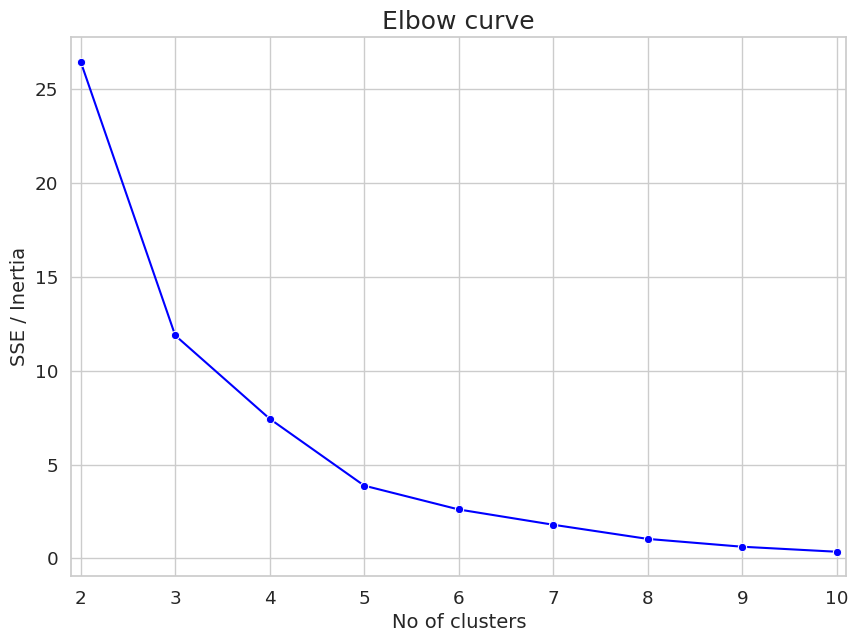

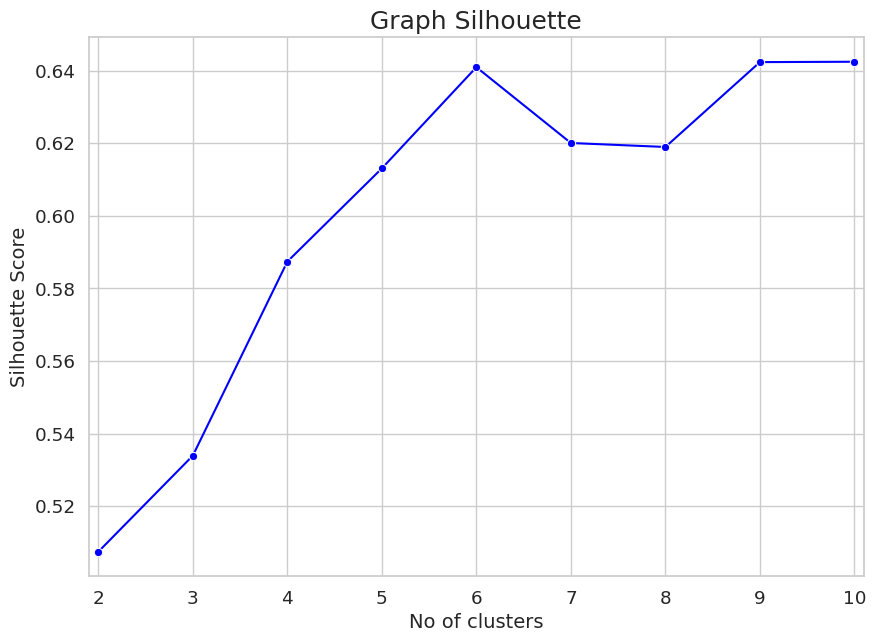

In [ ]:
#OPTIONAL: Elbow plot with inertia
#Elbow method to choose the optimal number of clusters
# # ============= Function for plotting elbow curve =============== #
def plot_elbow_curve_k_means(start, end, data):
  sse = {}
  score = {}

  for k in (range(start, end+1)):
    kmeans = KMeans(n_clusters=k, random_state=9)
    preds = kmeans.fit_predict(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    score[k] = (round(silhouette_score(data, preds),4))
    print("For n_clusters = {}, silhouette score is {}".format(k, round(silhouette_score(data, preds), 4)))
    print("For n_clusters = {}, SSE is {}".format(k, round(kmeans.inertia_, 4)))


  sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)

  plt.figure(figsize=(10, 7))
  ax = sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker="o", dashes=False, color="blue")
  ax.set_title('Elbow curve', fontsize=18)
  ax.set_xlabel('No of clusters', fontsize=14)
  ax.set_ylabel('SSE / Inertia', fontsize=14)
  ax.set(xlim=(start-0.1, end+0.1))
  plt.plot()

  plt.figure(figsize=(10, 7))
  ax = sns.lineplot(x=list(score.keys()), y=list(score.values()), marker="o", dashes=False, color="blue")
  ax.set_title('Graph Silhouette', fontsize=18)
  ax.set_xlabel('No of clusters', fontsize=14)
  ax.set_ylabel('Silhouette Score', fontsize=14)
  ax.set(xlim=(start-0.1, end+0.1))
  plt.plot()

# Plotting elbow curve for k=2 to k=10
plot_elbow_curve_k_means(2,10,cluster6)

In [ ]:
#Actual Clustering
kmeans = KMeans(n_clusters=4,random_state=9)
preds = kmeans.fit_predict(cluster6)

pd.Series(kmeans.labels_).value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    10
1     5
3     4
2     4
dtype: int64

In [ ]:
#new column for cluster labels associated with each subject
cluster6['labels'] = kmeans.labels_
cluster6['Cluster'] = cluster6['labels'].map({0:'First', 1:'Second',2:'Third',3:'Fourth'})

# Order the cluster
cluster6['Cluster'] = cluster6['Cluster'].astype('category')
cluster6['Cluster'] = cluster6['Cluster'].cat.reorder_categories(['First','Second','Third','Fourth'])

#============== INVERSE TRANSFORMATION FOR NUMERIC DATA ================#

cluster6[Num_features] = scaler.inverse_transform(cluster6[Num_features])

<ipython-input-231-e3f62e9ae977>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster6['labels'] = kmeans.labels_
<ipython-input-231-e3f62e9ae977>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster6['Cluster'] = cluster6['labels'].map({0:'First', 1:'Second',2:'Third',3:'Fourth'})
<ipython-input-231-e3f62e9ae977>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
#=============== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ================#
dict_cat = {}
dict_num = {}

for cat in cluster6.select_dtypes('object'):
  dict_cat[cat] = lambda x: x.value_counts().index[0]

for num in cluster6.select_dtypes(['int64','float64']):
  # dict_num[num] = ['mean', 'median', 'min', 'max']
  dict_num[num] = ['mean']

#============ CREATE TABLE FOR EACH CLUSTER ============#

cluster6.rename(columns = {'labels':'Total'}, inplace = True)
data_percluster = cluster6.groupby('Cluster').agg({

        'Total':'count',
        **dict_num,
        **dict_cat

}).T

data_percluster

<ipython-input-232-7a0676f7aa59>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster6.rename(columns = {'labels':'Total'}, inplace = True)


,Cluster,First,Second,Third,Fourth
Total,count,10.000000,5.000000,4.0,4.0
riwayat vaksin CYD,mean,9.671717,25.666667,0.0,100.0
Persentase kasus dengan riwayat DBD serumah,mean,4.040404,48.666667,100.0,37.5


In [ ]:
cluster6

,riwayat vaksin CYD,Persentase kasus dengan riwayat DBD serumah,Total,Cluster
Bangkala (Jeneponto),0.000000,0.000000,0,First
Biringkanaya (Makassar),33.333333,0.000000,0,First
Bonto Duri (Makassar),0.000000,0.000000,0,First
Bontomarannu (Gowa),100.000000,100.000000,3,Fourth
Borongbulo (Gowa),0.000000,100.000000,2,Third
Galesong Utara (Takalar),0.000000,100.000000,2,Third
Gowa (Gowa),0.000000,0.000000,0,First
Ma'rang (Pangkep),100.000000,0.000000,3,Fourth
Mamajang (Makassar),100.000000,50.000000,3,Fourth
Manggala (Makassar),33.333333,33.333333,1,Second


In [ ]:
cluster6[cluster6['Cluster']== 'First']

,riwayat vaksin CYD,Persentase kasus dengan riwayat DBD serumah,Total,Cluster
Bangkala (Jeneponto),0.000000,0.000000,0,First
Biringkanaya (Makassar),33.333333,0.000000,0,First
Bonto Duri (Makassar),0.000000,0.000000,0,First
Gowa (Gowa),0.000000,0.000000,0,First
Panakkukang (Makassar),0.000000,0.000000,0,First
Pattalasang (Takalar),0.000000,0.000000,0,First
Rappocini (Makassar),11.111111,22.222222,0,First
Somba Opu (Gowa),25.000000,0.000000,0,First
Tamalate (Makassar),27.272727,18.181818,0,First
Ujung Tanah (Makassar),0.000000,0.000000,0,First


In [ ]:
cluster6[cluster6['Cluster']== 'Second']

,riwayat vaksin CYD,Persentase kasus dengan riwayat DBD serumah,Total,Cluster
Manggala (Makassar),33.333333,33.333333,1,Second
Mariso (Makassar),25.000000,50.000000,1,Second
Pallangga (Gowa),50.000000,50.000000,1,Second
Tamalanrea (Makassar),20.000000,60.000000,1,Second
Turikale (Maros),0.000000,50.000000,1,Second


In [ ]:
cluster6[cluster6['Cluster']== 'Third']

,riwayat vaksin CYD,Persentase kasus dengan riwayat DBD serumah,Total,Cluster
Borongbulo (Gowa),0.0,100.0,2,Third
Galesong Utara (Takalar),0.0,100.0,2,Third
Moncongloe (Maros),0.0,100.0,2,Third
Ujung Pandang (Makassar),0.0,100.0,2,Third


In [ ]:
cluster6[cluster6['Cluster']== 'Fourth']

,riwayat vaksin CYD,Persentase kasus dengan riwayat DBD serumah,Total,Cluster
Bontomarannu (Gowa),100.0,100.0,3,Fourth
Ma'rang (Pangkep),100.0,0.0,3,Fourth
Mamajang (Makassar),100.0,50.0,3,Fourth
Tallo (Makassar),100.0,0.0,3,Fourth


In [ ]:
join_table = pd.concat([cluster1,cluster2, cluster3, cluster4, cluster5, cluster6], axis=1)
join_table

,Jumlah DBD,Tahun,Total,Cluster,Persentase status gizi baik,Persentase status gizi lebih,Persentase status gizi kurang,Total,Cluster,Pendapatan ( < 2.500.000 ),...,Jumlah DBD,jumlah kamar,jumlah orang,genangan air sekitar,Total,Cluster,riwayat vaksin CYD,Persentase kasus dengan riwayat DBD serumah,Total,Cluster
Bangkala (Jeneponto),1.0,19.000000,3,Fourth,100.000000,0.000000,0.0,1,Second,100.000000,...,1.0,4.000000,4.000000,100.000000,4,Fifth,0.000000,0.000000,0,First
Biringkanaya (Makassar),3.0,34.666667,2,Third,66.666667,33.333333,0.0,1,Second,0.000000,...,3.0,4.333333,5.000000,66.666667,2,Third,33.333333,0.000000,0,First
Bonto Duri (Makassar),1.0,21.000000,3,Fourth,0.000000,0.000000,100.0,2,Third,0.000000,...,1.0,5.000000,6.000000,0.000000,0,First,0.000000,0.000000,0,First
Bontomarannu (Gowa),2.0,23.000000,3,Fourth,0.000000,100.000000,0.0,0,First,0.000000,...,2.0,4.500000,5.500000,100.000000,2,Third,100.000000,100.000000,3,Fourth
Borongbulo (Gowa),1.0,23.000000,3,Fourth,0.000000,100.000000,0.0,0,First,0.000000,...,1.0,2.000000,4.000000,100.000000,4,Fifth,0.000000,100.000000,2,Third
Galesong Utara (Takalar),1.0,7.000000,0,First,0.000000,100.000000,0.0,0,First,0.000000,...,1.0,3.000000,7.000000,100.000000,5,Sixth,0.000000,100.000000,2,Third
Gowa (Gowa),1.0,34.000000,2,Third,0.000000,100.000000,0.0,0,First,100.000000,...,1.0,2.000000,5.000000,100.000000,4,Fifth,0.000000,0.000000,0,First
Ma'rang (Pangkep),1.0,22.000000,3,Fourth,100.000000,0.000000,0.0,1,Second,0.000000,...,1.0,5.000000,7.000000,100.000000,2,Third,100.000000,0.000000,3,Fourth
Mamajang (Makassar),2.0,27.000000,3,Fourth,0.000000,50.000000,50.0,2,Third,0.000000,...,2.0,3.000000,4.000000,50.000000,1,Second,100.000000,50.000000,3,Fourth
Manggala (Makassar),6.0,22.000000,1,Second,83.333333,16.666667,0.0,1,Second,16.666667,...,6.0,3.666667,5.500000,66.666667,3,Fourth,33.333333,33.333333,1,Second


In [ ]:
from geopy.geocoders import Nominatim

def coordinateKota(df):
    coord = df.index
    geolocator = Nominatim(user_agent="arcgis")
    kota = []
    locations = []
    for i, j in enumerate(coord):
        kota_item = ','.join(str(x) for x in j)
        kota_item = kota_item + ", Sulawesi Selatan" if "Sulawesi" not in kota_item else kota_item
        kota.append(kota_item)
        location = geolocator.geocode(j, timeout=None)
        if location != None:
            locations.append([location.address, location.latitude, location.longitude])

    locations = pd.DataFrame(locations, columns=['address', 'lat', 'long'])
    return locations

a = coordinateKota(join_table)
a

,address,lat,long
0,"Jalan Poros Bangkala Pallikang, Jeneponto, Ben...",-5.571721,119.569474
1,"Biringkanaya, Makassar, Sulawesi Selatan, Sula...",-5.105424,119.516580
2,"Bonto Duri, Tamalate, Makassar, Sulawesi Selat...",-5.182126,119.423136
3,"Bontomarannu, Gowa, Sulawesi Selatan, Sulawesi...",-5.257845,119.534383
4,"Galesong Utara, Takalar, Sulawesi Selatan, Sul...",-5.261051,119.387271
5,"Gowa Dina, Gowa 2, Kanem كانم, Tchad تشاد",13.446883,15.519233
6,"Mamajang, Makassar, Sulawesi Selatan, Sulawesi...",-5.166008,119.419736
7,"Manggala, Makassar, Sulawesi Selatan, Sulawesi...",-5.167724,119.504685
8,"Mariso, Makassar, Sulawesi Selatan, Sulawesi, ...",-5.159931,119.410489
9,"Moncongloe, Maros, Sulawesi Selatan, Sulawesi,...",-5.142363,119.556829


In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='myapp4')
location = geolocator.geocode('Gowa') # Ganti untuk mengecek alamat berbeda

if location:
    print(location.address)
    print("Latitude:", location.latitude)
    print("Longitude:", location.longitude)
else:
    print("Lokasi tidak ditemukan.")

Gowa, Sulawesi Selatan, Sulawesi, Indonesia
Latitude: -5.3290868
Longitude: 119.76602766629097
